# DS 241 Project 2023 

## Group Members 

Lara Neizel : $24786845$ 

Matthew Holm : $26067404$

Shalomé Neethling : $24560502$

## Import and prepare data

In [192]:
# import nessecary libraries 
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

import statsmodels.api as sm
import statsmodels.formula.api as smf
from scipy import stats
from scipy.stats import chi2_contingency

from sklearn.metrics import accuracy_score

# Additional imports 
from mlxtend.feature_selection import SequentialFeatureSelector
from sklearn.linear_model import LogisticRegression
from sklearn import linear_model

from sklearn.ensemble import RandomForestClassifier  
from sklearn.ensemble import RandomForestRegressor   
from sklearn.metrics import accuracy_score 
from sklearn.metrics import mean_squared_error, r2_score 
from sklearn.preprocessing import StandardScaler

In [193]:
# import data 
df = pd.read_csv('MatiesMarketplace.csv')

In [194]:
# set seed 
np.random.seed(18)

## Background

In this project, we have leveraged the sales records of `Maties Marketplace` to conduct a comprehensive analysis and develop predictive models based on various relevant factors and variables. 
 
`Maties Marketplace` is an online fashion retailer that primarily serves customers in South Africa while also expanding its reach to international markets. 

To facilitate our predictive modeling, we've established a working assumption that customers will make a purchase. It's important to note that our analysis is based on the assumption that the data collection process was carried out randomly and independently.

The variables in our data set are: 
`
- `Sales` this is our reponse variable that indicates the total amount spent on each order. 
- `Month`: Month in which the sale was made.
- `AgeInMonths`: The age in months of the customer.
- `ProfileInMonths`: The time in months since the user created the profile.
- `Subscribed`: A variable indicating whether the customer is subscribed to promotional emails. If the customer is subscribed, the variable indicates to which promotional email list they are subscribed.
- `NumPrevOrders`: The number of previous orders of the customer.
- `AvgSpend`: The average amount (in Rands) of all previous orders placed by the customer.
- `POSR`: An internal score (Point-of-Sales Ratio) collected by Maties Marketplace, which indicates the customer’s likeliness to respond to advertising.
- `OPR`: An internal score (Order-Purchase Ratio) collected by Maties Marketplace. It represents the ratio of the number of times a customer makes a purchase to the number of times the customer adds items to a cart.
- `Online`: The time (in minutes) spent on the website by the customer before making a purchase.
- `Discount`: The amount of discount offered on the cart of goods purchased by the customer in the order. This value is given as a percentage, i.e., between 0 and 100.
- `ShippingOption`: A variable indicating which shipping option the customer selected.
- `Shipping`: A variable indicating if the shipping is Free or Paid for by the customer.
- `Country`: The country to which the customer’s order is shipped.
- `Platform`: A variable indicating the device (iOS, Android, Computer) used by the customer.
- `Payment`: A variable indicating the payment method used by the customer.
- `DayOfWeek`: The day of the week on which the customer makes a purchase on Maties Marketplace.
- `Ad 1`: This variable indicates if advertisement 1 was used (“Yes”) or not (“No”). This is a social media targeted advertisement that displays an image and a short description of a product that the customer might like.
- `Ad 2`: This variable indicates if advertisement 2 was used (“Yes”) or not (“No”). Advertisement 2 is only offered on the website for customers viewing products. It displays the popular “frequently bought together” items when a customer clicks on certain other products.
- `Ad 3`: This variable indicates if advertisement 3 was used (“Yes”) or not (“No”). Advertisement 3 is only offered on the website homepage. This is the “Hot Products” advertisement that shows a list of popular or new products that a customer might want to buy.
- `SocialMedia`: This variable indicates which social media channel was used to contact the customer in relation to Ad 1.

# Data Exploration and Sample Descriptive Statistics

In [195]:
# check for missing values
missing_vals = 'Missing Values' if df.isna().any().all() else 'No Missing Values'
print(f'{missing_vals}')

No Missing Values


In [196]:
# check shape of data 
print("The shape of the data is:", df.shape)

The shape of the data is: (15000, 21)


# Univariate 

Conducting a comprehensive univariate analysis to gain a thorough understanding of the dataset, involving the use of data visualization and graphical representations for all variables, in conjunction with the presentation of descriptive statistics.

## Exploration of nominal variables 

In [197]:
# function for nominal variables 

def nominal_plots(var, df):
    '''
    This function takes a variable as its input. 
    It then proceeds to draw the barplot, boxplot, absolute and relative frequencies plots.
    It is used for nominal variables.
    '''
    print()
    print("Exploration of variable:", var)
    
    # Set the desired Seaborn style and palette
    sns.set_style("ticks")
    sns.set_palette("viridis")
    
    # Customize the plots
    sns.set(font_scale=3)  # Adjust font size
    
    # Initialize a custom figure
    sns.set_style("ticks")
    sns.set_palette("viridis")
    fig = plt.figure(figsize=(15, 15), constrained_layout=True)
    gs = fig.add_gridspec(4, 4)

    # boxplot 
    sns.set_style("ticks")
    sns.set_palette("viridis")
    ax1 = fig.add_subplot(gs[0:2, :])
    
    # adjust labels to prefered order and draw plot 
    if (var=='DayOfWeek'):
        sns.set_style("ticks")
        sns.set_palette("viridis")
        sns.boxplot(x='Sales', y=var, data=df, orient="h",ax=ax1,
                    order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
        
    elif (var=='Month'):
        sns.set_style("ticks")
        sns.set_palette("viridis")
        sns.boxplot(x='Sales', y=var, data=df, orient="h",ax=ax1,
                    order=['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September',
                          'October', 'November', 'December'])
    
    # grouped according to continents 
    elif (var=='Country'):
        sns.set_style("ticks")
        sns.set_palette("viridis")
        sns.boxplot(x='Sales', y=var, data=df, orient="h",ax=ax1,
                  order=['South Africa', 'Egypt', 'Kenya', 'England', 'Belgium', 'Ireland', 'Germany', 
                           'Netherlands', 'Italy', 'Japan', 'China', 'India', 'United States', 'Brazil'])  
    
    elif (var=='Ad_1'):
        sns.set_style("ticks")
        sns.set_palette("viridis")
        sns.boxplot(x='Sales', y=var, data=df, orient="h",ax=ax1,
                  order=['Yes', 'No'])
                    
    else:
        sns.set_style("ticks")
        sns.set_palette("viridis")
        sns.boxplot(x='Sales', y=var, data=df, orient="h",ax=ax1)
       
    ax1.set_title('Boxplot')

    # absolute freq 
    ax2 = fig.add_subplot(gs[2:, :2])
    var_counts = df[var].value_counts()
    
    # adjust labels to prefered order and draw plot 
    if (var=='DayOfWeek'):
        sns.set_style("ticks")
        sns.set_palette("viridis")
        sns.barplot(x=var_counts.index, y=var_counts.values, ax=ax2, 
                    order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
        
    elif (var=='Month'):
        sns.set_style("ticks")
        sns.set_palette("viridis")
        sns.barplot(x=var_counts.index, y=var_counts.values, ax=ax2,
                    order=['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September',
                          'October', 'November', 'December'])
        
    # grouped according to continents 
    elif (var=='Country'):
        sns.set_style("ticks")
        sns.set_palette("viridis")
        sns.barplot(x=var_counts.index, y=var_counts.values, ax=ax2,
                    order=['South Africa', 'Egypt', 'Kenya', 'England', 'Belgium', 'Ireland', 'Germany', 
                           'Netherlands', 'Italy', 'Japan', 'China', 'India', 'United States', 'Brazil'])
    
    elif (var=='Ad_1'):
        sns.set_style("ticks")
        sns.set_palette("viridis")
        sns.barplot(x=var_counts.index, y=var_counts.values, ax=ax2,
                    order=['Yes', 'No'])
                    
    else:
        sns.set_style("ticks")
        sns.set_palette("viridis")
        sns.barplot(x=var_counts.index, y=var_counts.values, ax=ax2)
    
    # draw x labels slanted with country and months being drawn smaller
    if (var=='Country' or var=='Month'):
        ax2.set_xticklabels(ax2.get_xticklabels(), rotation=40, ha="right", fontsize=18)
   
    else :
        ax2.set_xticklabels(ax2.get_xticklabels(), rotation=40, ha="right")
    
    ax2.set_title('Absolute Frequency')
   
    # Relative Frequency 
    ax3 = fig.add_subplot(gs[2:, 2:])
    rel_freq = var_counts / len(df)

    # adjust labels to prefered order and draw plot 
    if (var=='DayOfWeek'):
        sns.set_style("ticks")
        sns.set_palette("viridis")
        sns.barplot(x=rel_freq.index, y=rel_freq.values, ax=ax3, 
                    order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
    
    elif (var=='Month'):
        sns.set_style("ticks")
        sns.set_palette("viridis")
        sns.barplot(x=rel_freq.index, y=rel_freq.values, ax=ax3, 
                    order=['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September',
                          'October', 'November', 'December'])
        
    # grouped according to continents 
    elif (var=='Country'):
        sns.set_style("ticks")
        sns.set_palette("viridis")
        sns.barplot(x=rel_freq.index, y=rel_freq.values, ax=ax3, 
                    order=['South Africa', 'Egypt', 'Kenya', 'England', 'Belgium', 'Ireland', 'Germany', 
                           'Netherlands', 'Italy', 'Japan', 'China', 'India', 'United States', 'Brazil'])  
    
    elif (var=='Ad_1'):
        sns.set_style("ticks")
        sns.set_palette("viridis")
        sns.barplot(x=rel_freq.index, y=rel_freq.values, ax=ax3, 
                    order=['Yes', 'No'])
   
    else:
        sns.set_style("ticks")
        sns.set_palette("viridis")
        sns.barplot(x=rel_freq.index, y=rel_freq.values, ax=ax3)
    
    # draw x labels slanted with country and months being drawn smaller
    if (var=='Country' or var=='Month'):
        ax3.set_xticklabels(ax3.get_xticklabels(), rotation=40, ha="right", fontsize=18)
    
    else :
        ax3.set_xticklabels(ax3.get_xticklabels(), rotation=50, ha="right")
    
    ax3.set_title('Relative Frequency')

     
    plt.show()


Exploration of variable: Subscribed


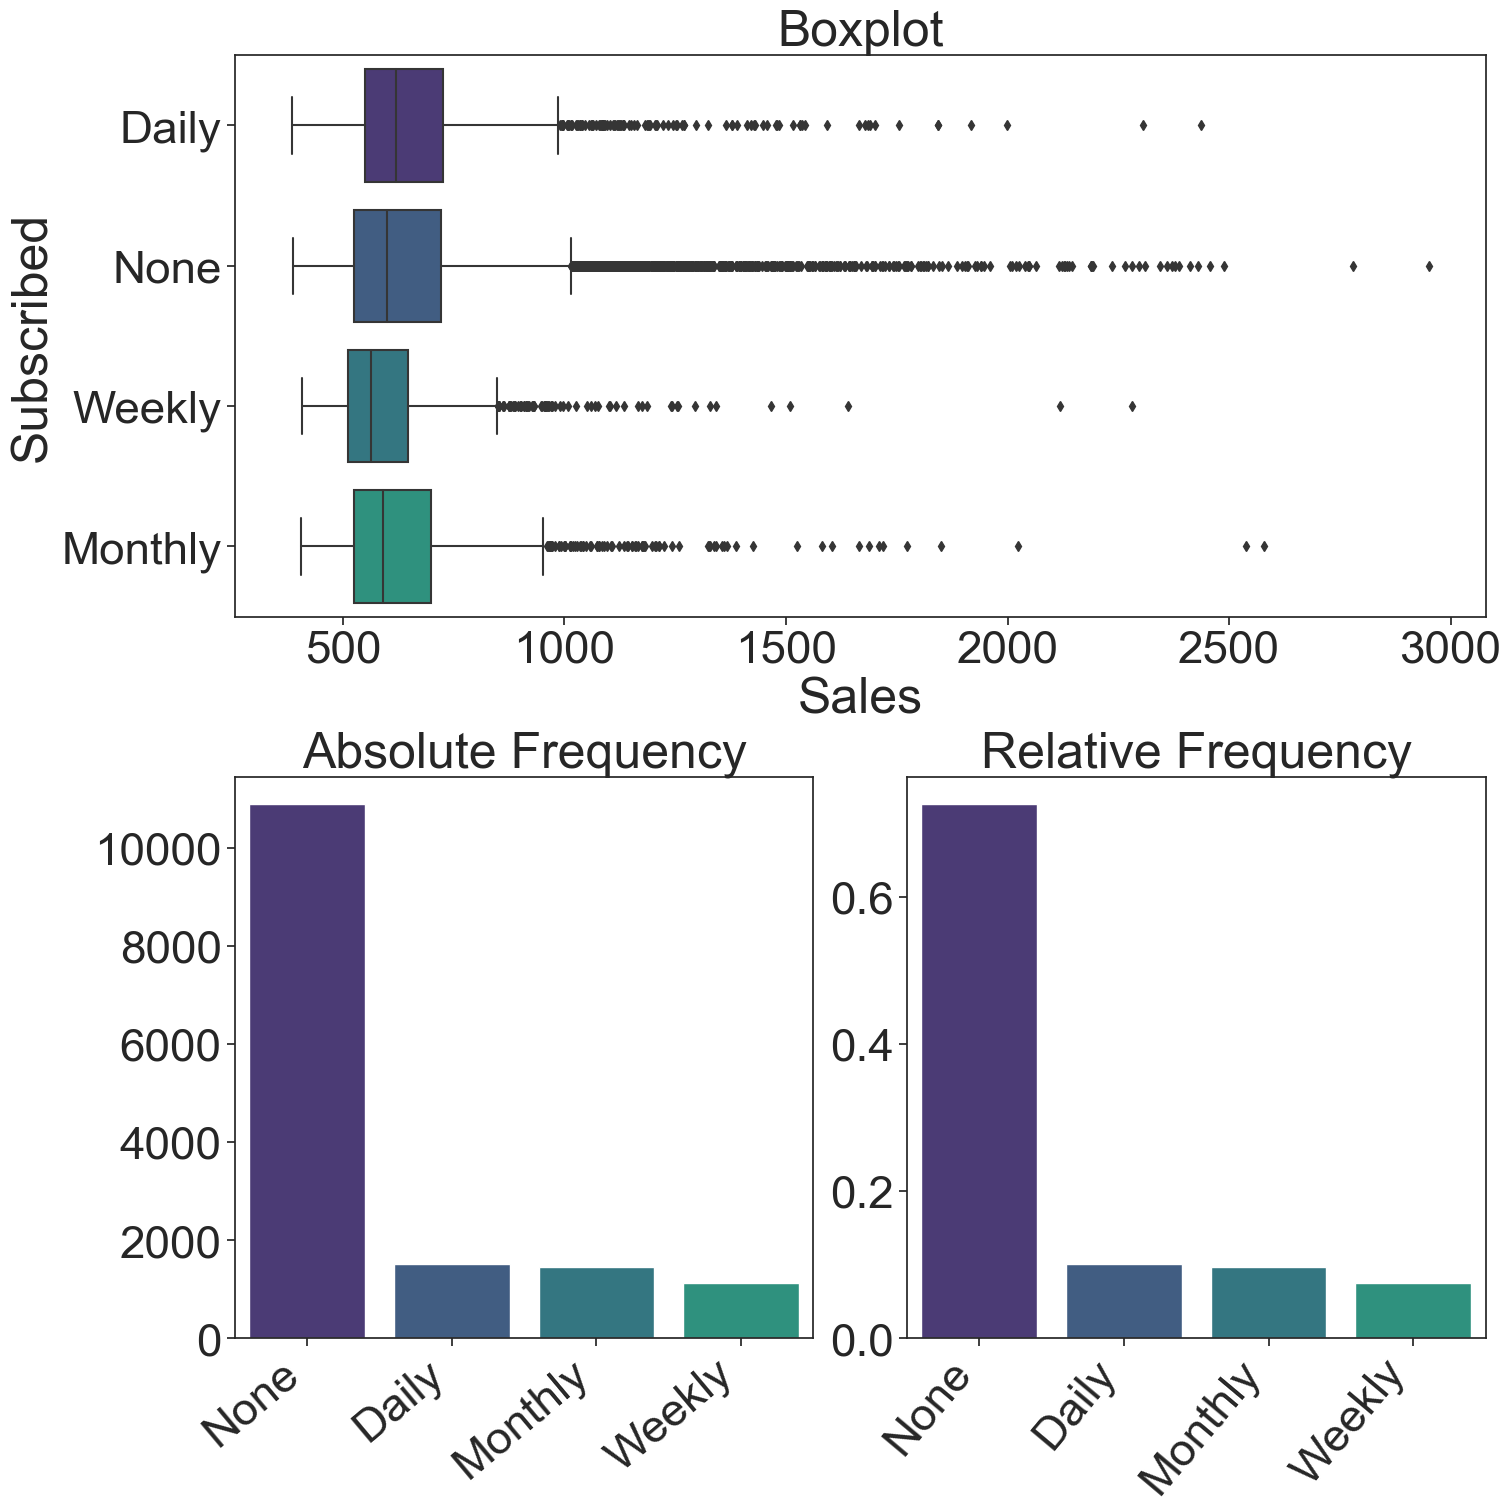

In [198]:
nominal_plots('Subscribed', df)

This variable indicates which, if any, promotional email list the client is subscribed to.

As observed in the boxplot, individuals subscribed to daily promotional emails spend the most on average. Therefore, it is advisable for Maties Marketplace to encourage their customers to sign up for daily promotional emails.

Additionally, customers who receive weekly emails exhibit the narrowest spending range. This suggests that their shopping preferences are somewhat consistent. Consequently, we can assume that the weekly emails are effective in influencing customer purchases. However, the average spending for the weekly category is the lowest. Therefore, it is recommended that the content of the weekly promotional emails be restructured to encourage our customers to make larger purchases. One approach to achieve this is to personalize the emails sent to each customer by anticipating their shopping preferences. This can be done by basing the tailored emails on the users previous purchaces. 

From our relative frequency graph we can see that more than 70% of the customers are not subscribed to any emails. These customers have the widest spending range, indicating that their shopping preferences are not consistent. This aligns with the likelihood that these customers are exposed to different forms of advertising that influence their shopping tendencies in varying ways. To further confirm this, additional investigation of other variables is required.


Exploration of variable: ShippingOption


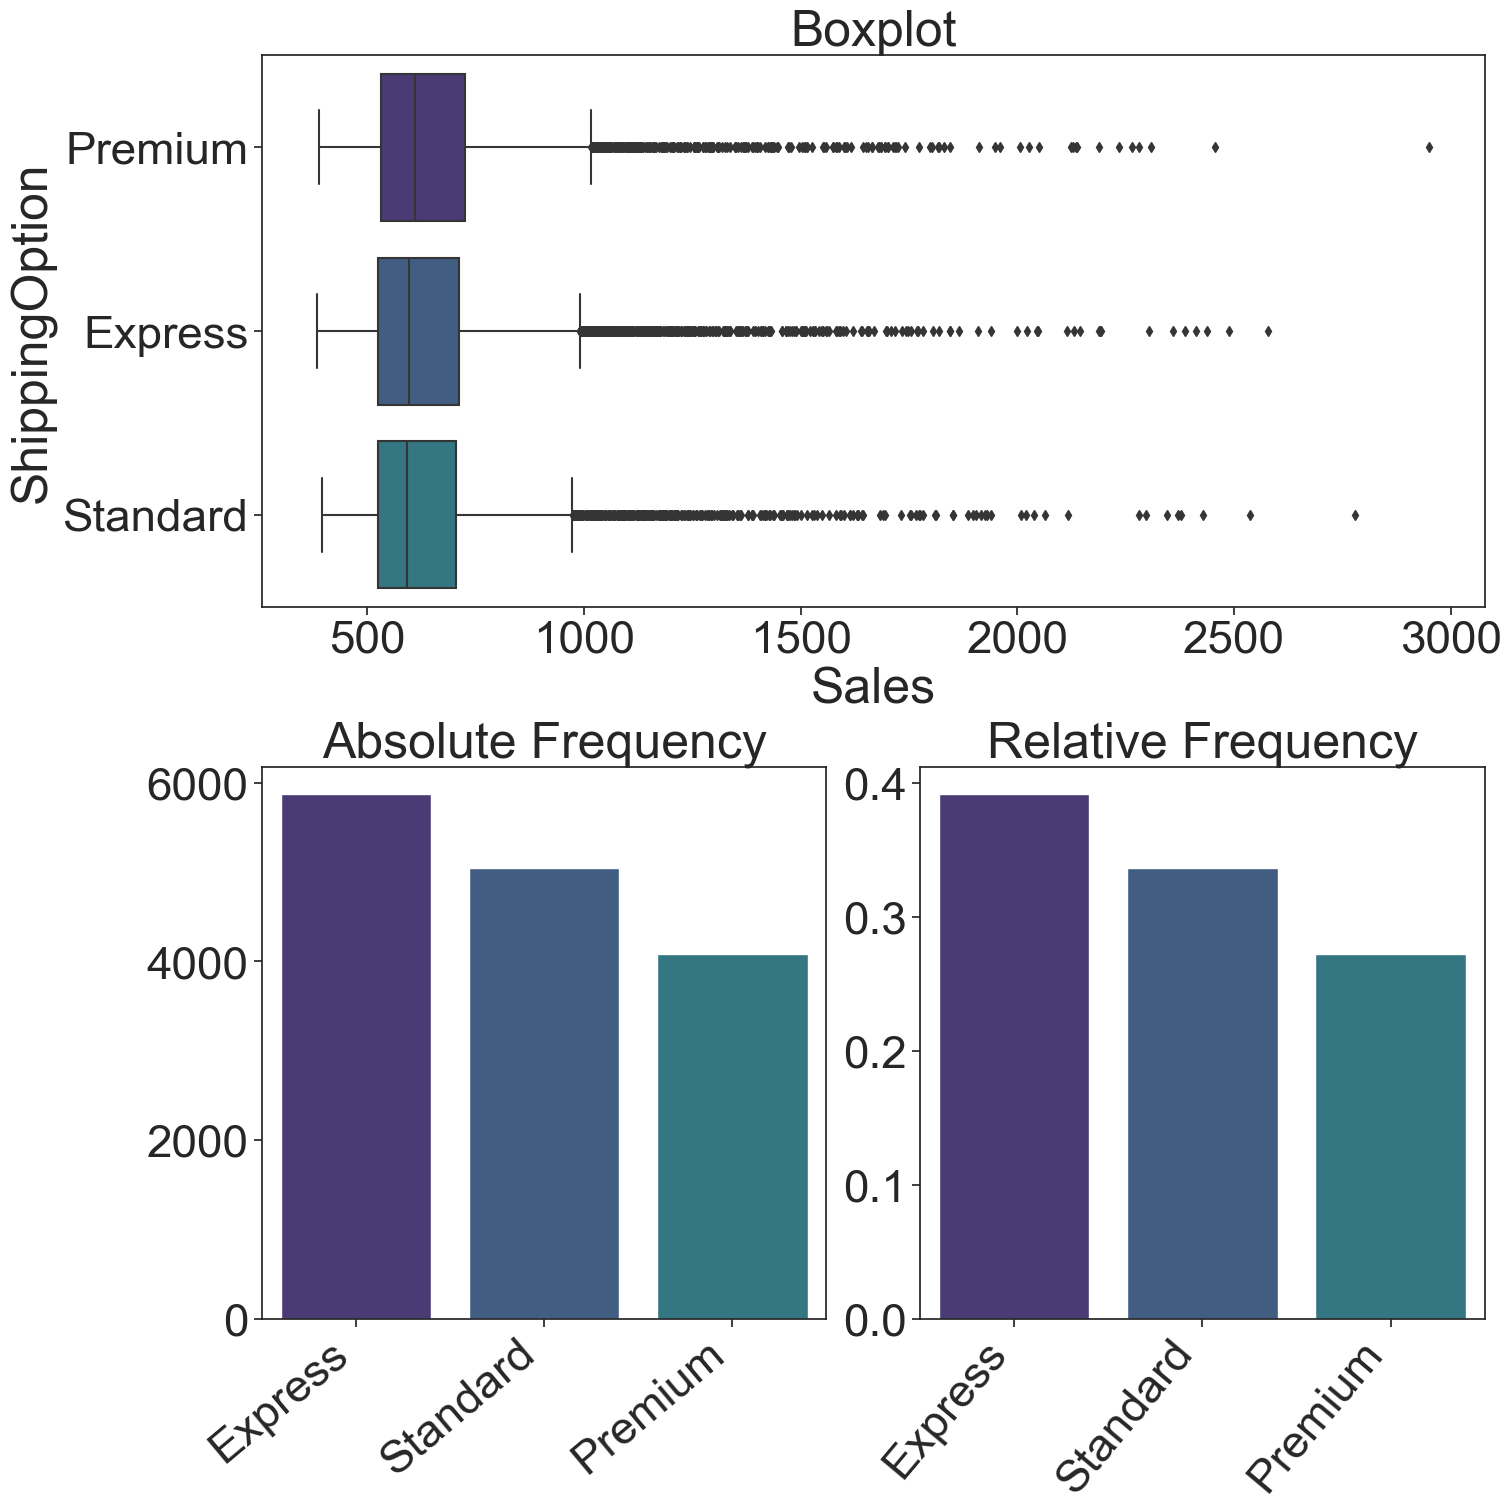

In [199]:
nominal_plots('ShippingOption', df)

As observed from the boxplots, the spreads of express, standard, and premium are approximately the same. They also have similar averages. However, the slight advantage in favor of premium indicates that a client might spend slightly more for premium shipping and, second to that, for express. This additional spending is most likely attributed to the added cost of faster shipping.

From our bar graphs, we can observe that most people prefer express shipping and are willing to incur the extra expense for faster delivery. However, more clients tend to favor standard shipping over premium shipping. This provides us with insights into what our customers are willing to spend extra money on.


Exploration of variable: Shipping


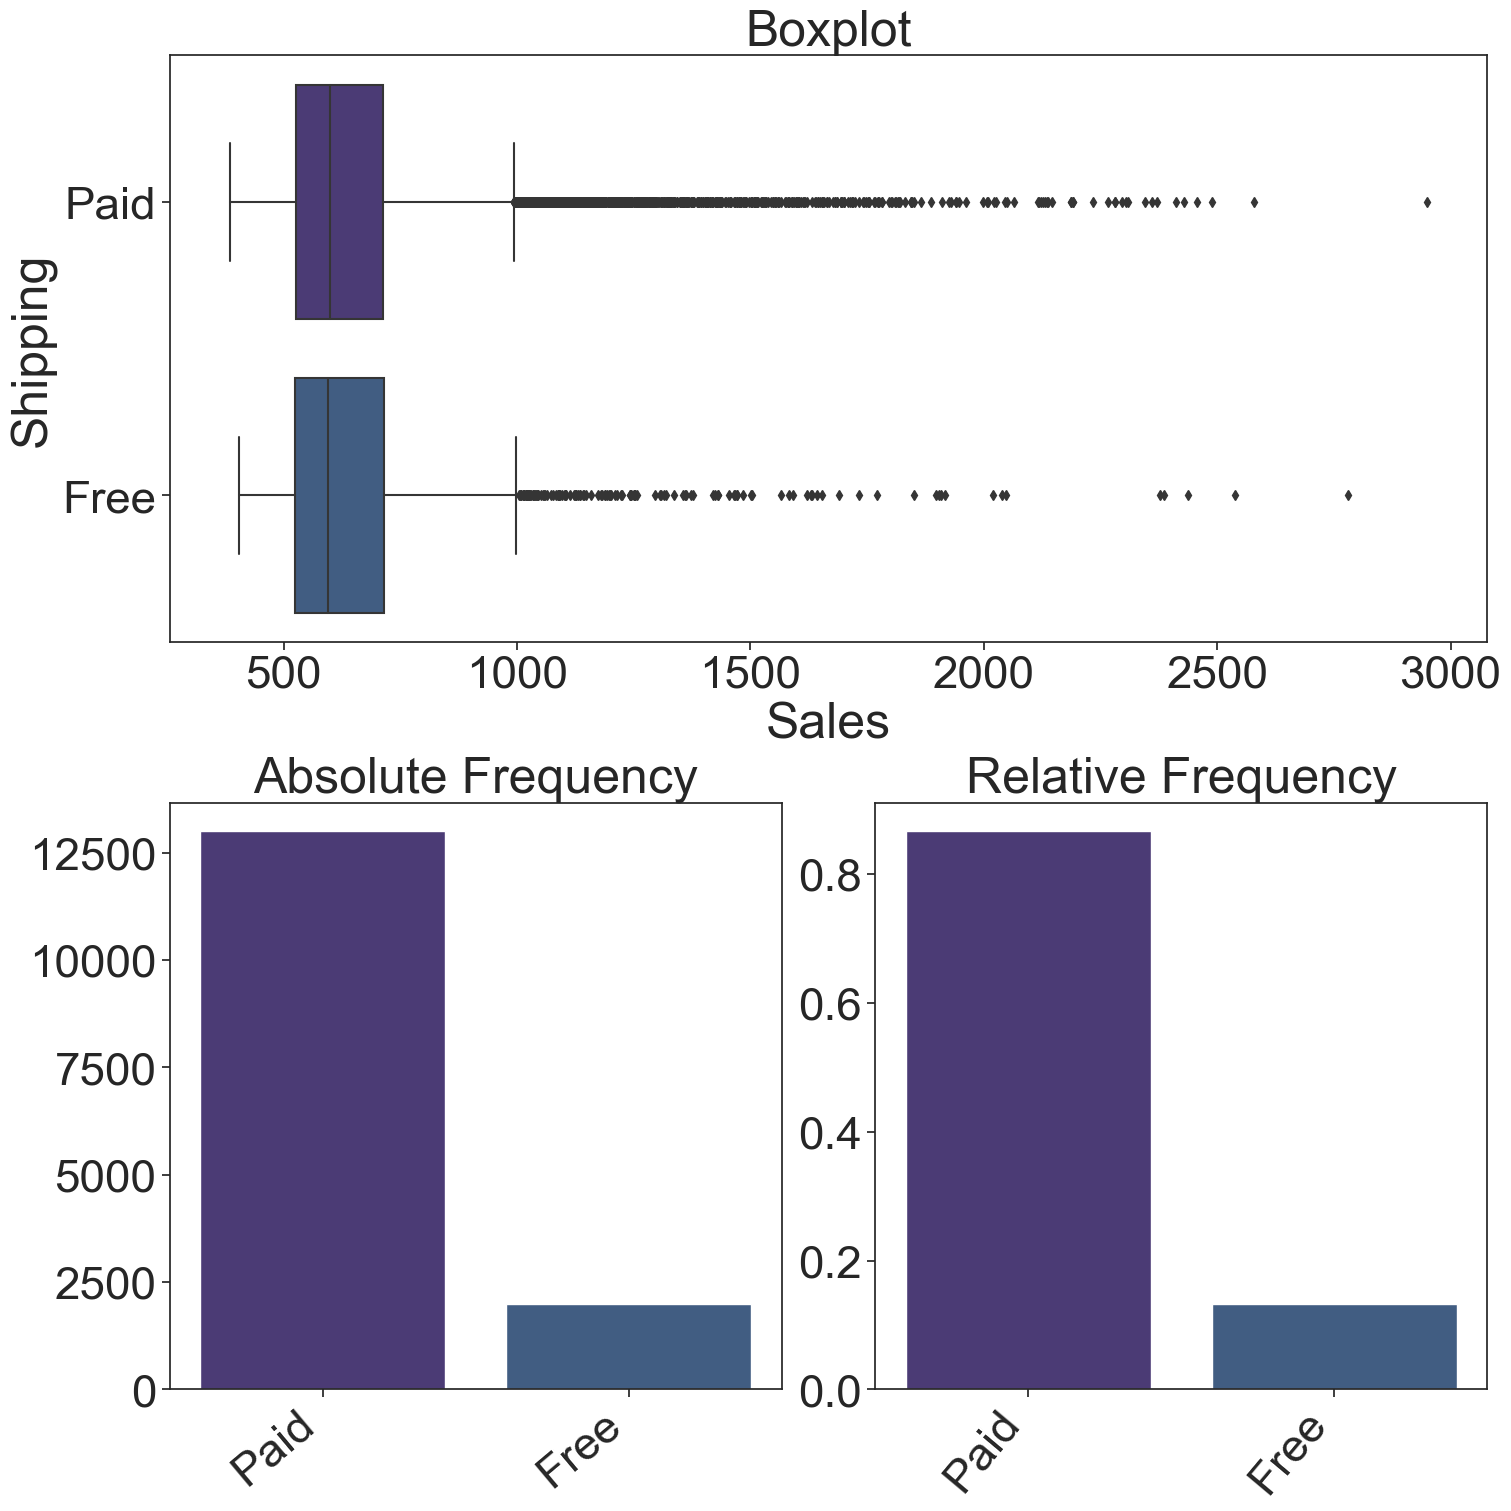

In [200]:
nominal_plots('Shipping', df)

As observed from the frequency graphs, most customers prefer to pay for shipping. This demonstrates that customers are willing to pay more for convenience. The boxplots indicate similar spending tendencies between customers who pay for shipping and those who don't.

One strategy to increase the number of customers is to enhance the shopping experience for maximum convenience, even if it results in higher product costs. This can be implemented in various ways, including but not limited to offering tracking and delivery alerts, as well as allowing for delivery to multiple addresses, such as work or home, assuming this is not already in place.


Exploration of variable: Platform


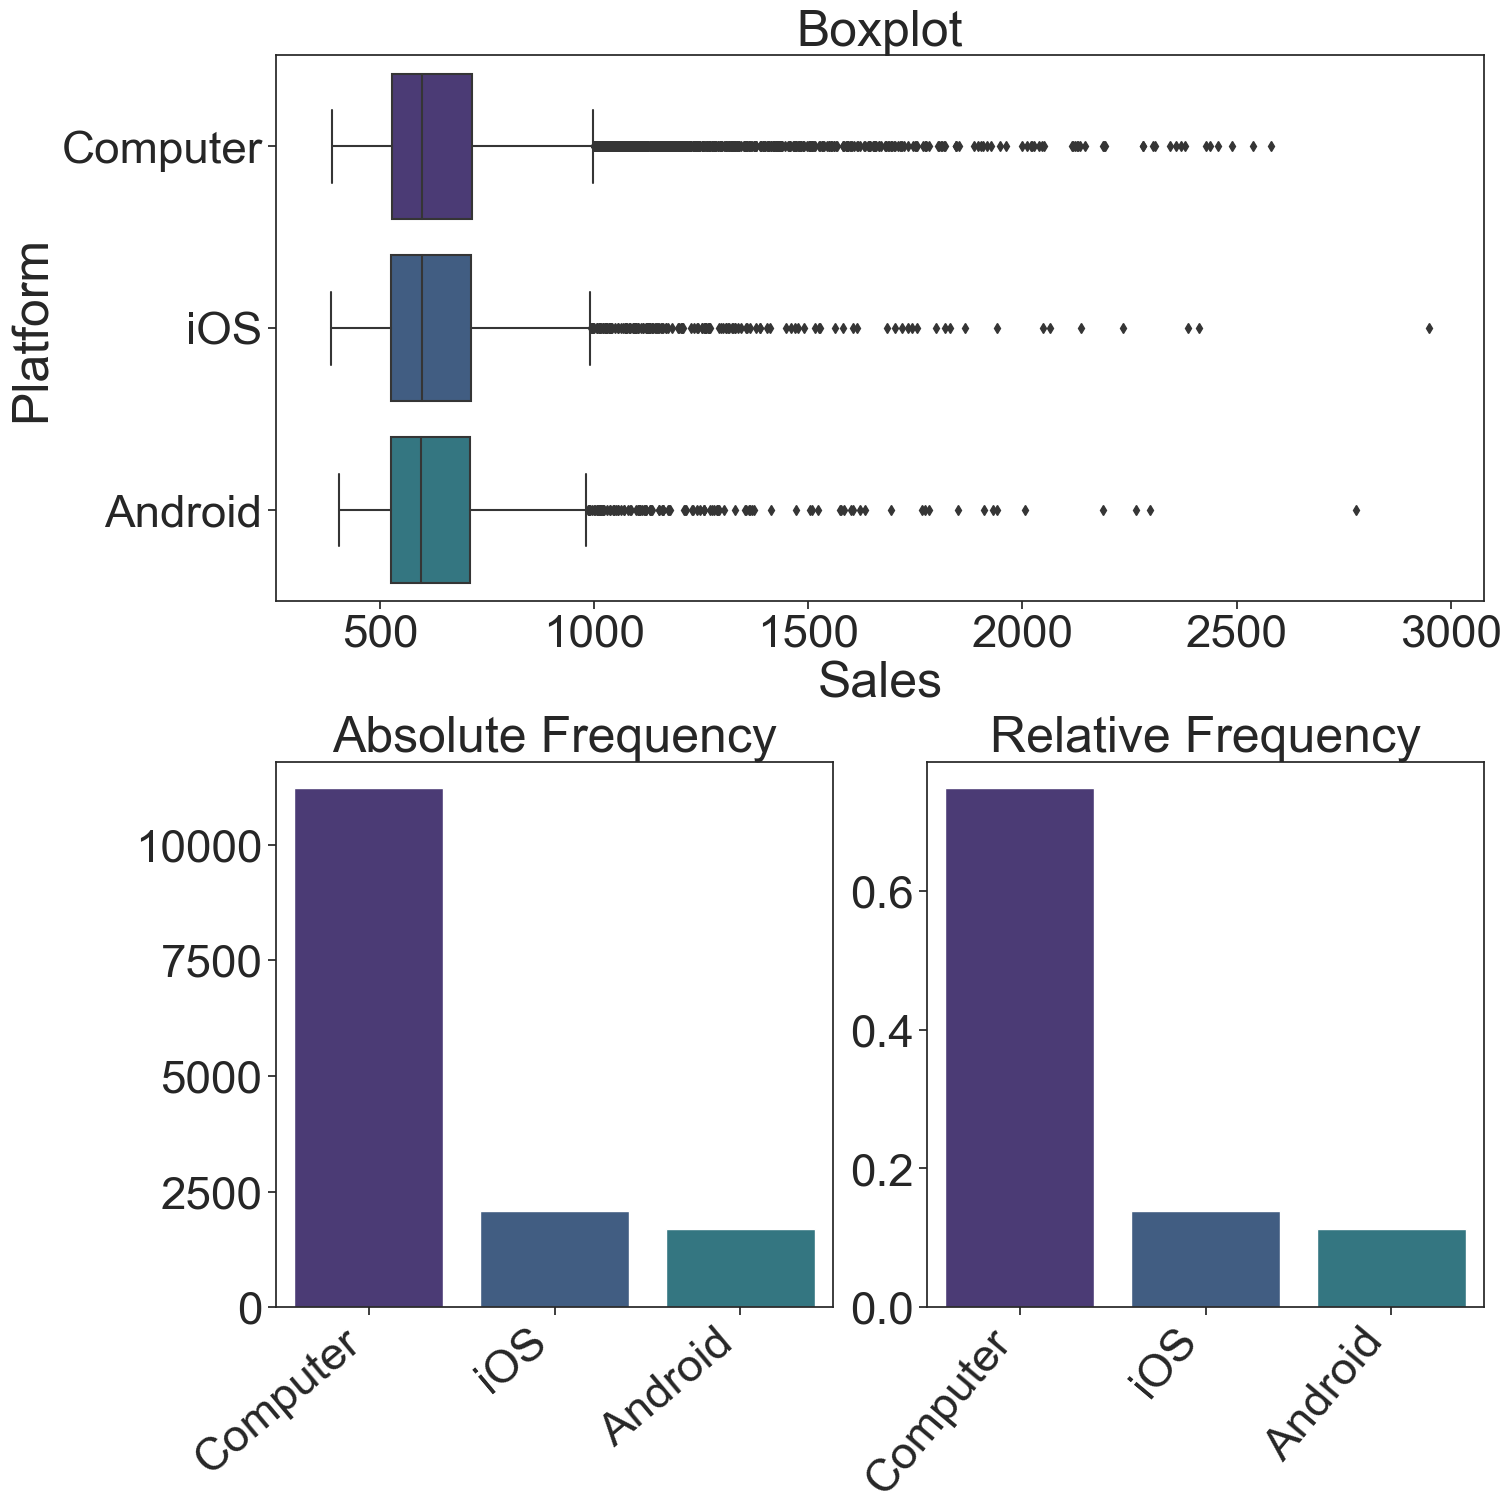

In [201]:
nominal_plots('Platform', df)

Differences in shopping tendencies among users who use different devices are not significant. However, from the bar graphs, we can see that customers prefer making purchases on computers compared to iOS and Android devices. This suggests that customers favor a larger screen for their online shopping experience.

To increase the number of customers who make mobile purchases, Maties Marketplace can consider launching a mobile app with virtual try-on features for clothing and accessories. The app could also include push notifications to keep customers updated on sales and deals, which could be an unexplored, cost-effective advertising method. Careful consideration of the extra costs should be weighed before deciding to implement it.


Exploration of variable: Payment


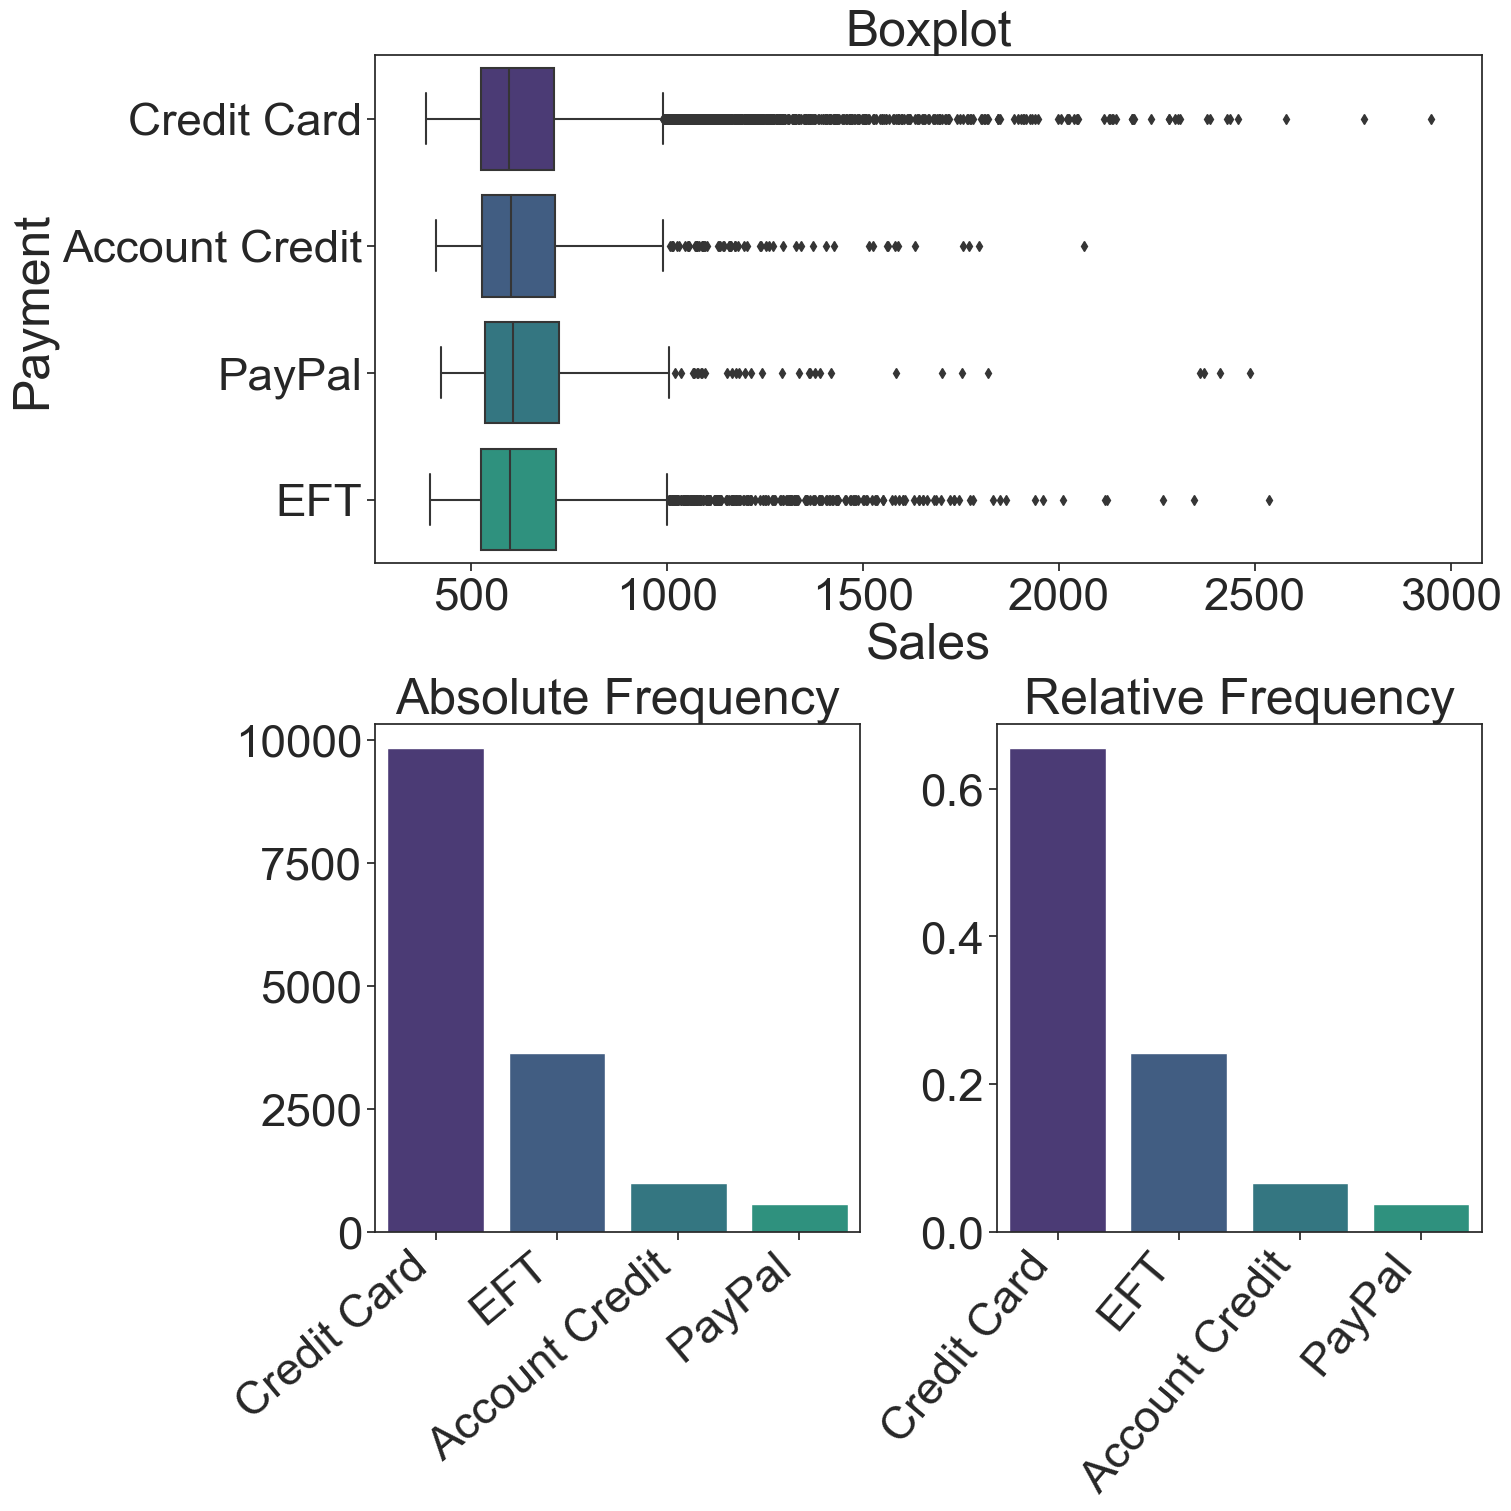

In [202]:
nominal_plots('Payment', df)

When looking at spending trends, this variable doesn't seem to hold much statistical significance, other than the fact that clients prefer using certain payment options over others. Thus, there is no need for further investigation.


Exploration of variable: DayOfWeek


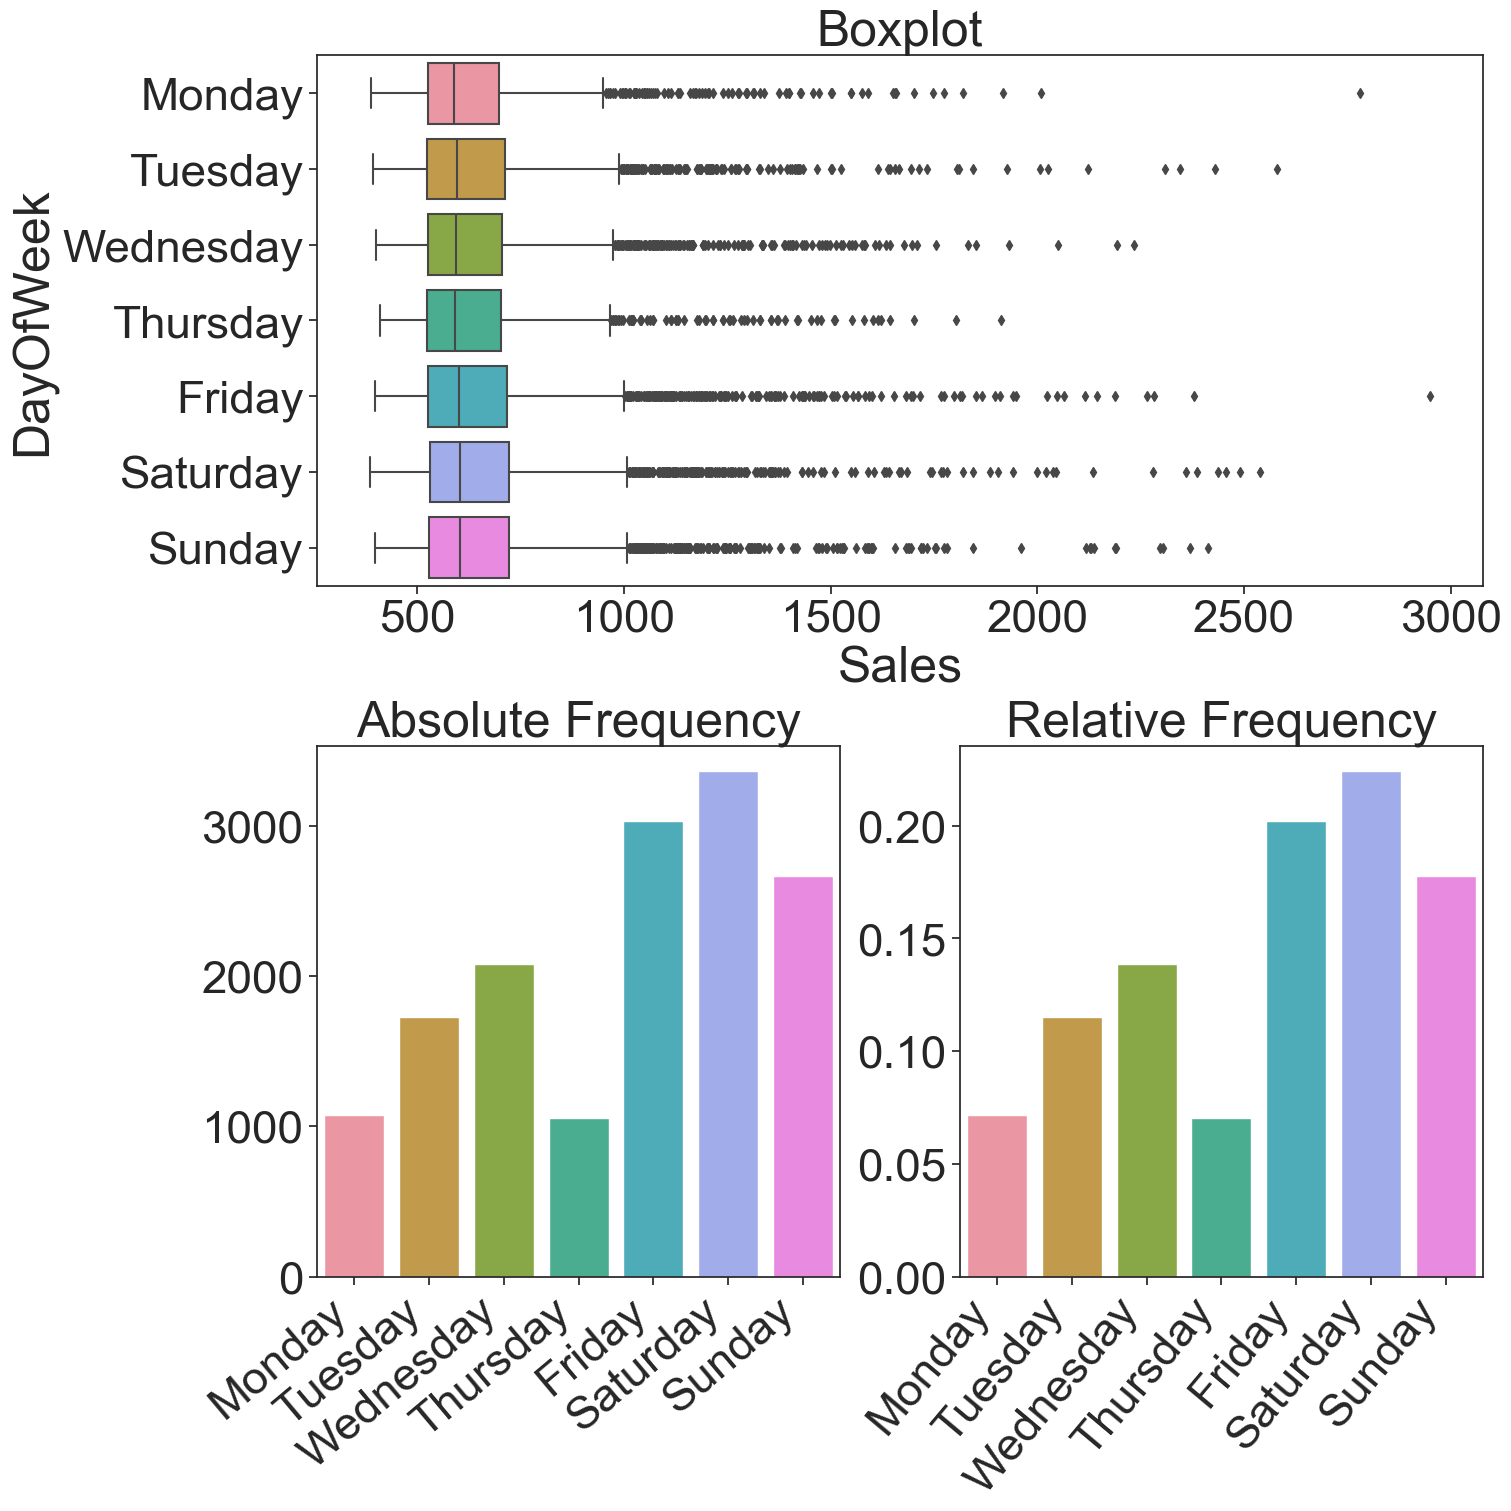

In [203]:
nominal_plots('DayOfWeek', df)

As observed from the boxplots, customers tend to spend the most over the weekend. Similarly, when considering the frequency graphs, we notice that more people tend to make their highest spending on weekends, especially on Saturdays. Conversely, the least amount of sales occurs on Mondays and Thursdays.

Maties Marketplace can attempt to encourage an increase in sales on these particular days using various strategies. We recommend offering discounts on Mondays and Thursdays, possibly on specific products, to simultaneously clear old stock. Another option is to provide free gifts or bonuses with purchases made on these days. It is essential to collect feedback after implementing these methods to refine strategies for future campaigns


Exploration of variable: Ad_1


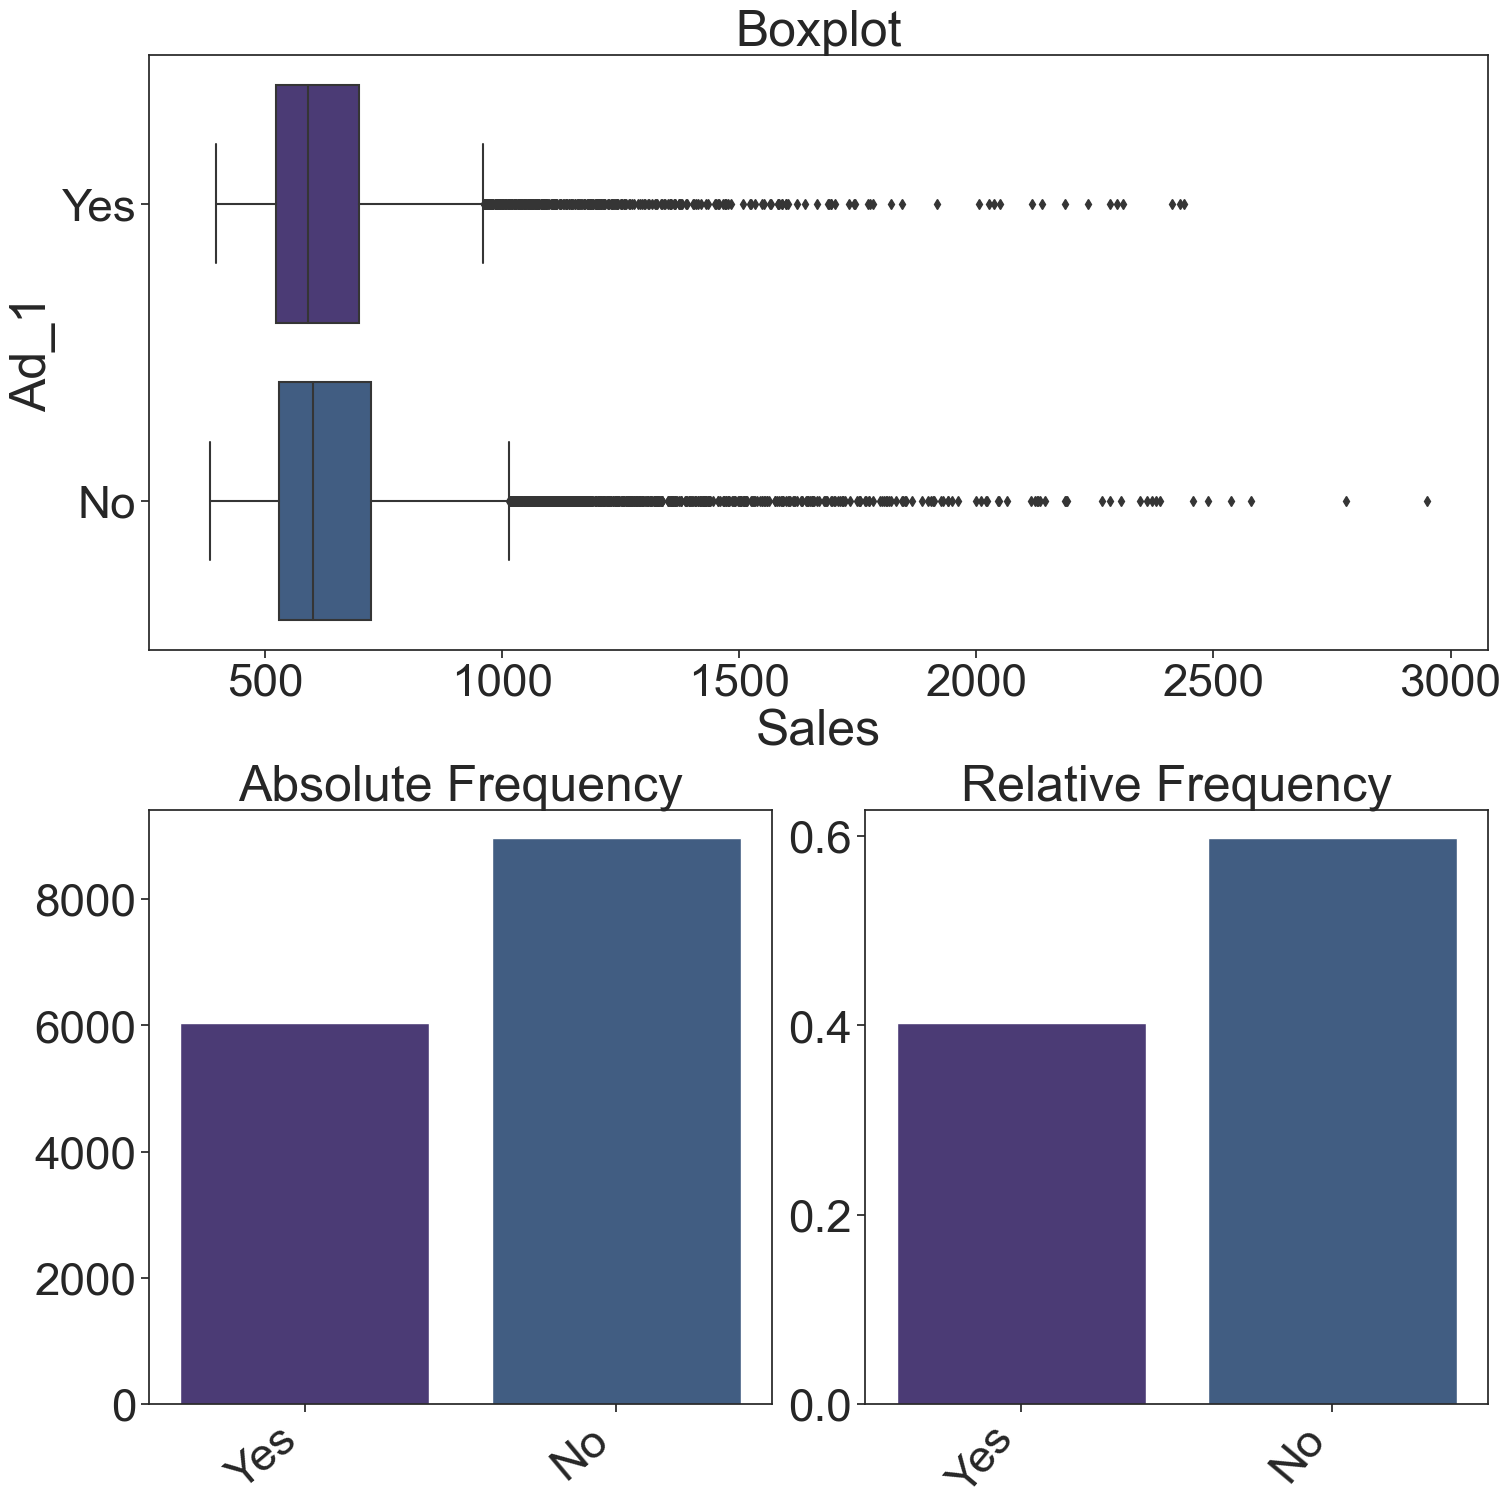

In [204]:
nominal_plots('Ad_1', df)


Exploration of variable: Ad_2


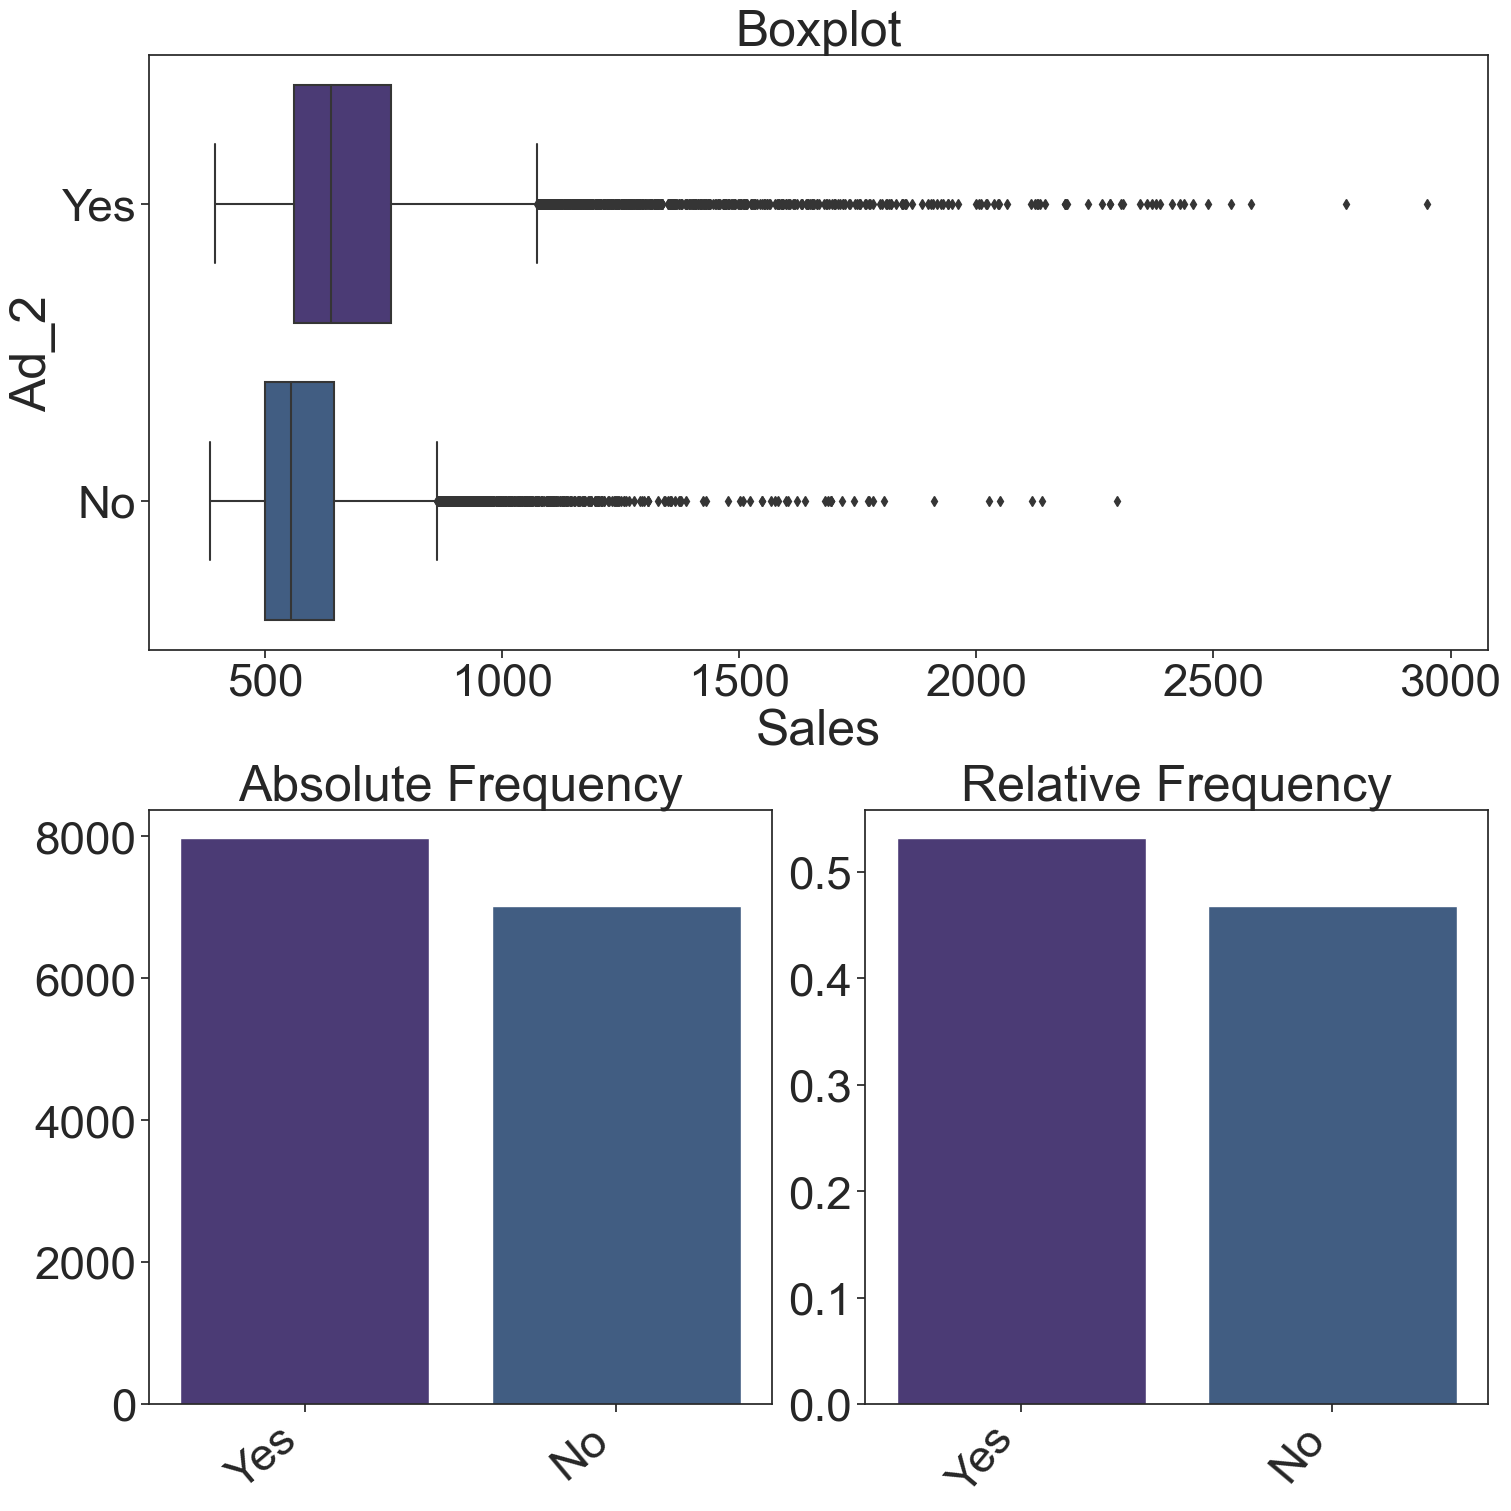

In [205]:
nominal_plots('Ad_2', df)


Exploration of variable: Ad_3


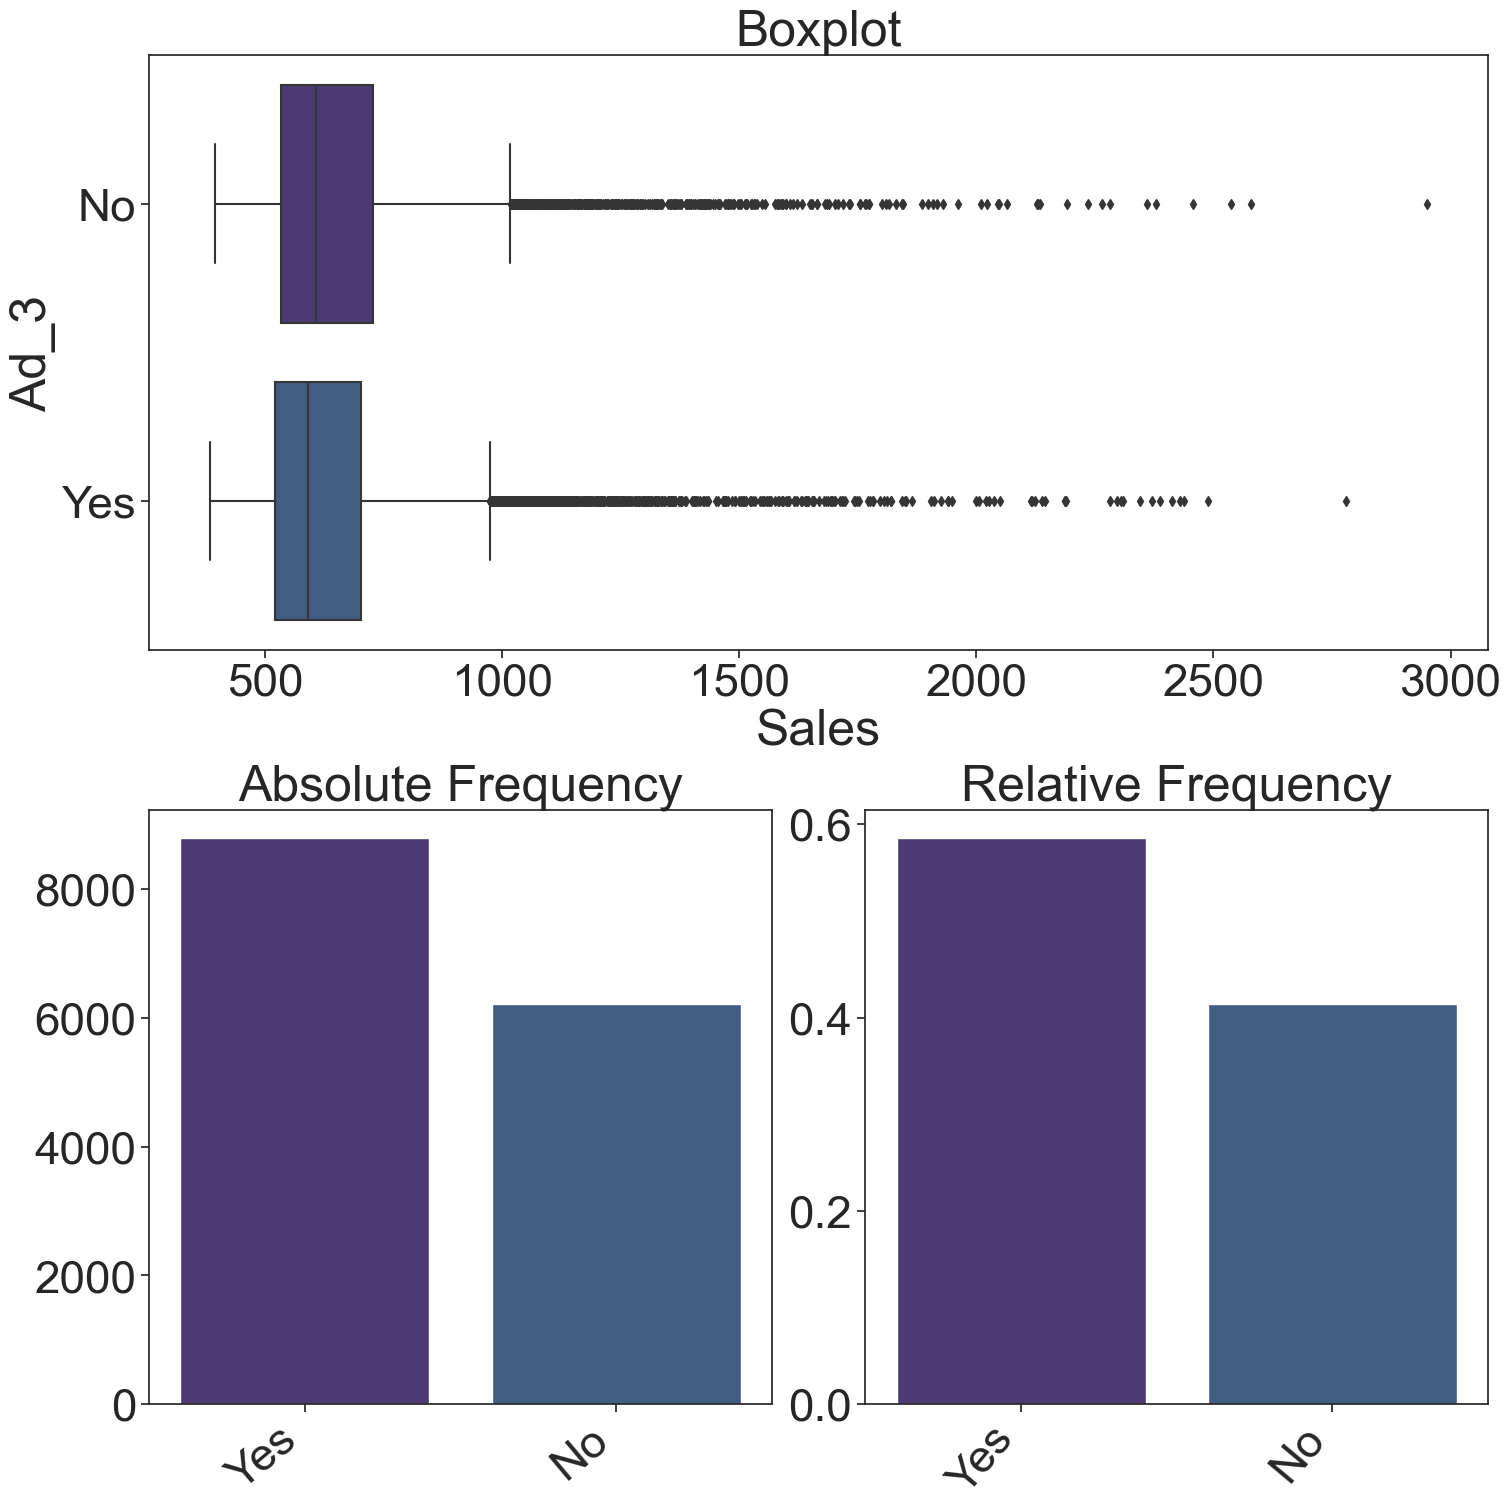

In [206]:
nominal_plots('Ad_3', df)

When comparing the frequency graphs of the ads, we observe that the majority of people view ads 2 and 3, but not ad 1. Consulting the boxplots reveals that, on average, a person spends more when they have not seen ad 1 compared to when they have. Maties Marketplace should reconsider the value of ad 1 as a use of resources. Our recommendation is that the client discontinues showing ad 1.

As seen in the boxplot for ad 2, this form of advertisement has a significantly positive impact on the amount clients are willing to spend. The frequency graph indicates that about 45% of customers do not see this advertisement. By increasing the exposure of this advertisement, we can raise the average amount spent by a customer.

A more in-depth investigation should be conducted to understand why people respond so positively to ad 2, and the findings should be implemented in subsequent advertisements.


Exploration of variable: SocialMedia


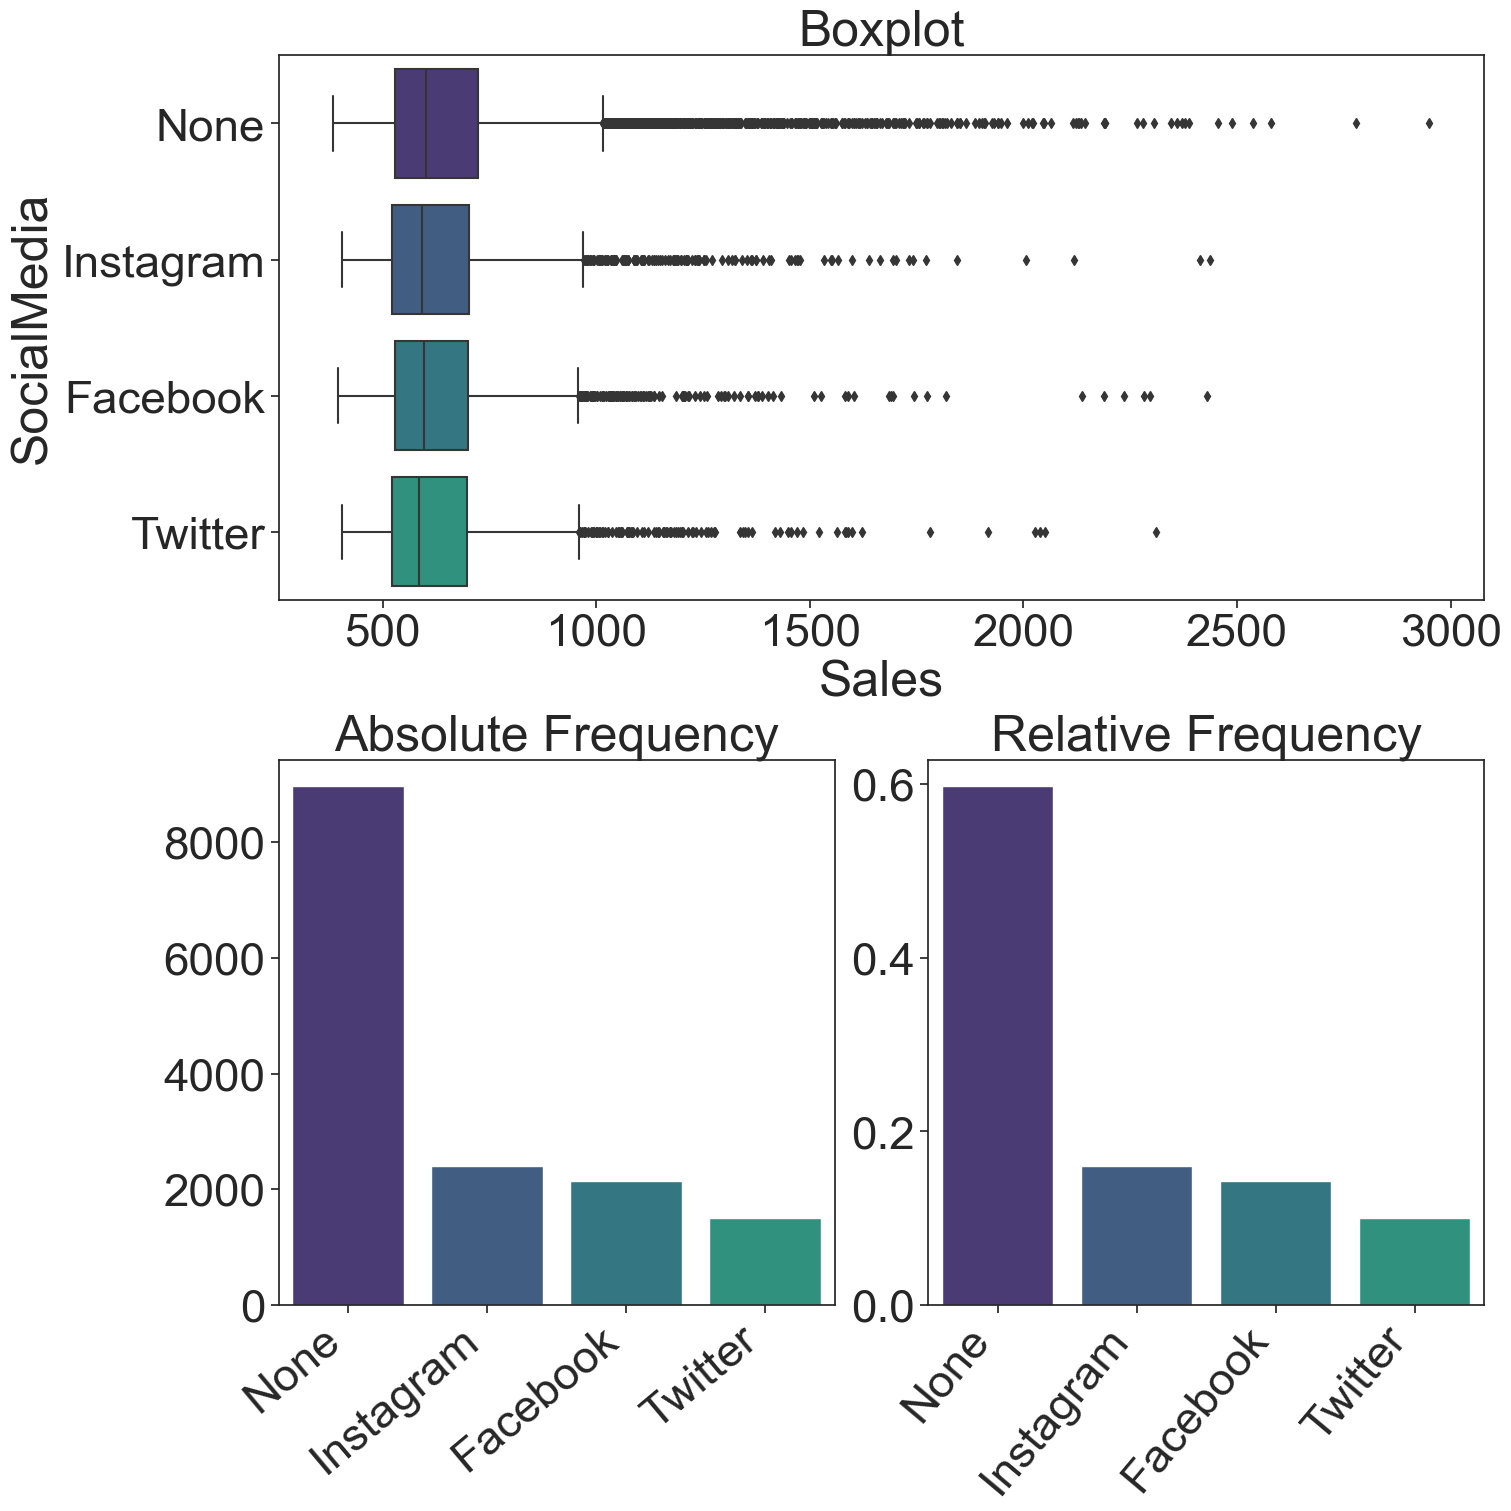

In [207]:
nominal_plots('SocialMedia', df)

When looking at spending trends, this variable doesn't seem to hold much statistical significance, other than the fact that most customers search for the website apposed to following it from a social media channel. Thus, there is no need for further investigation.


Exploration of variable: Month


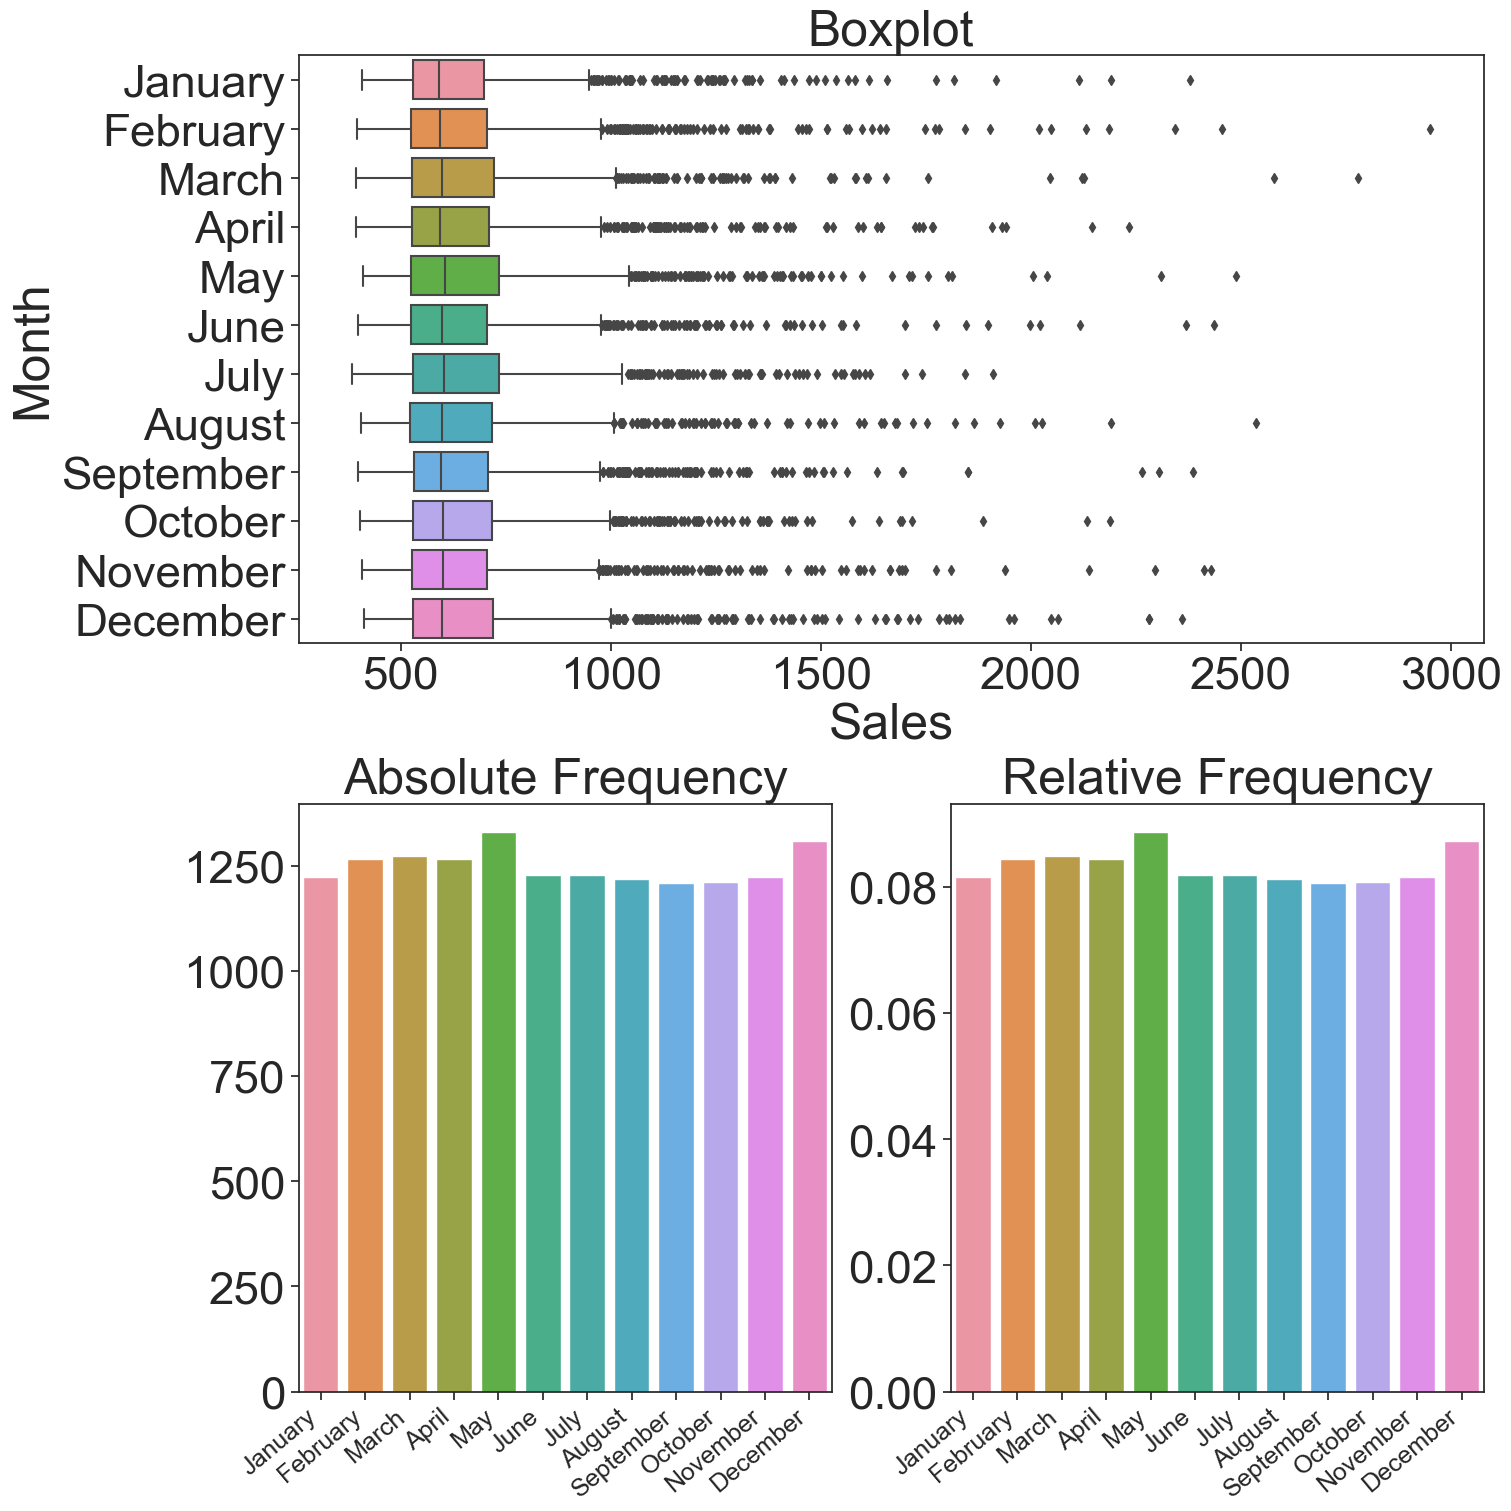

In [208]:
nominal_plots('Month', df)


Exploration of variable: Country


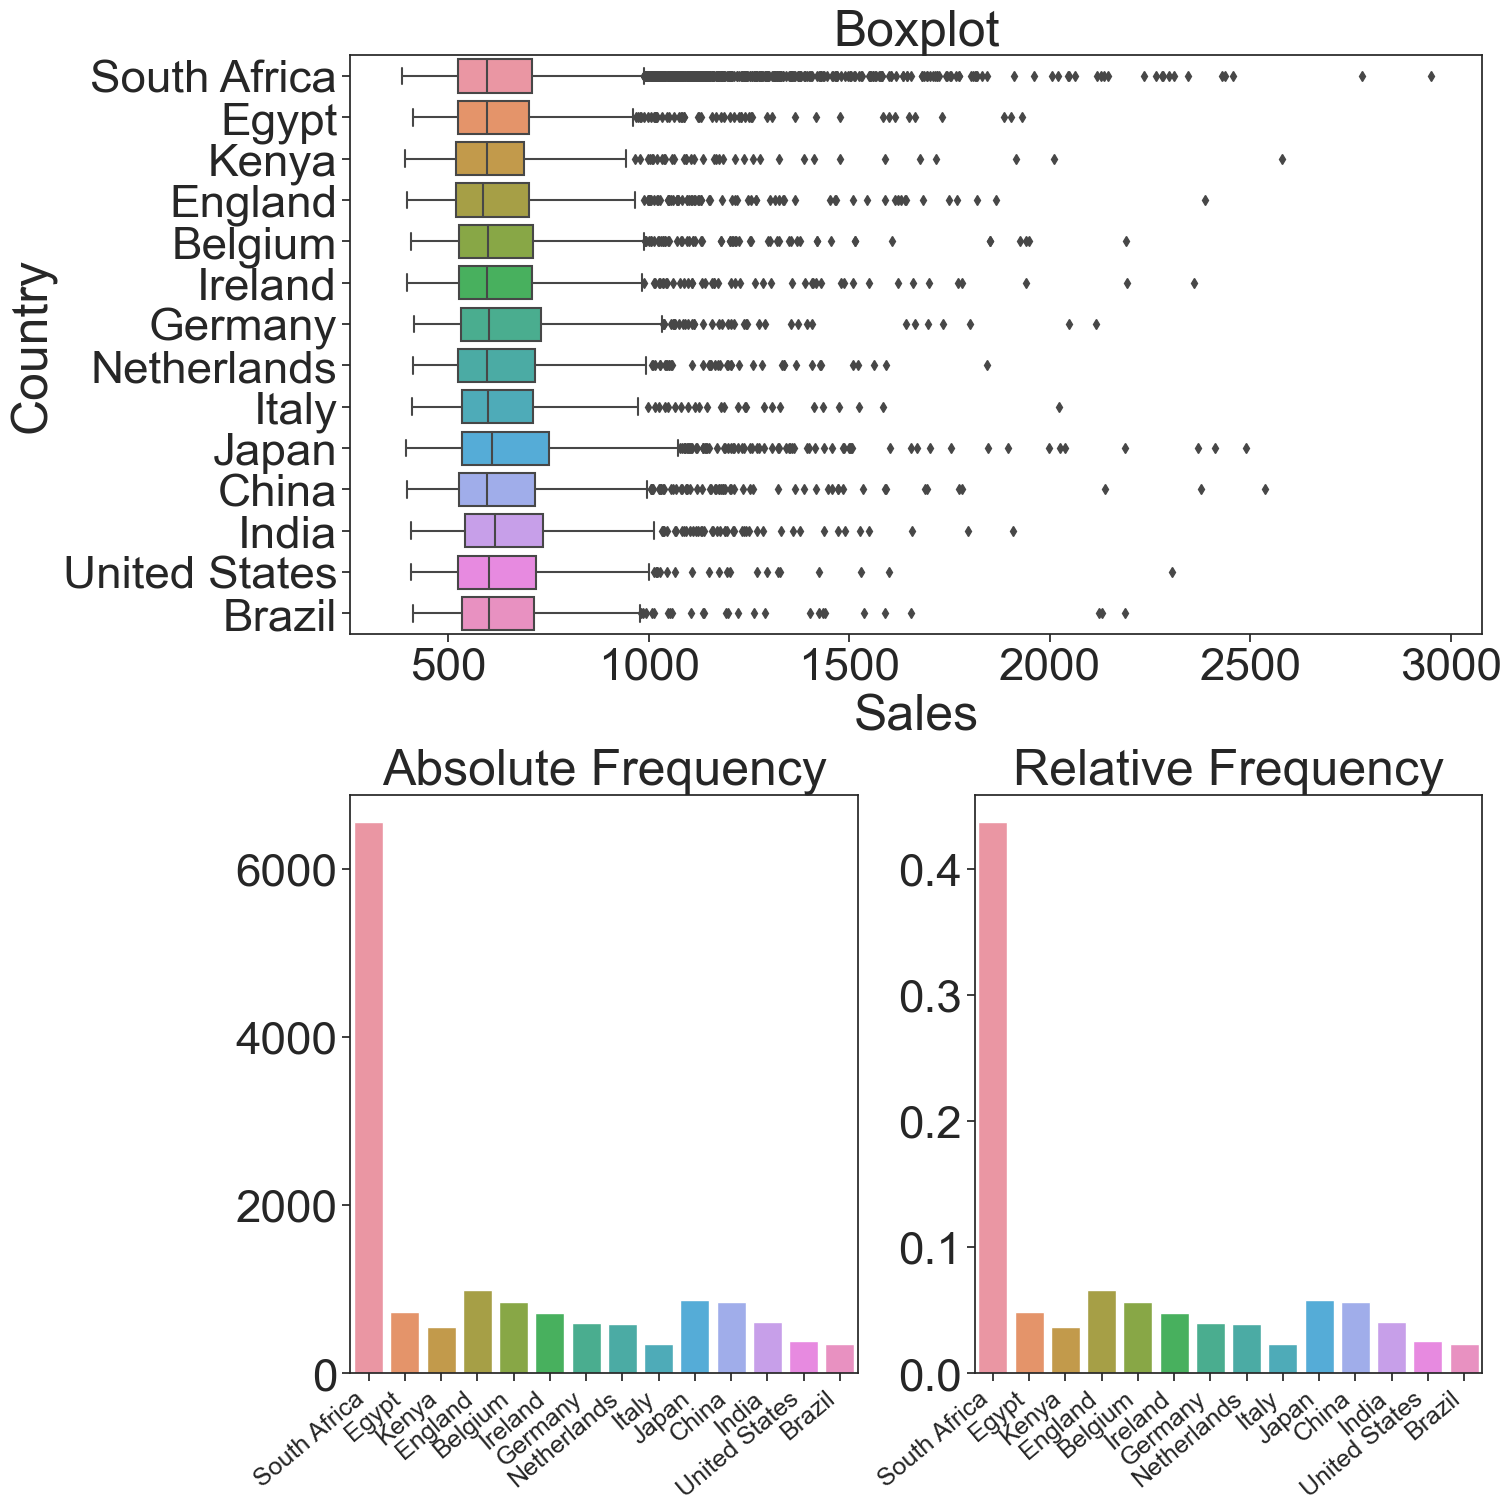

In [209]:
nominal_plots('Country', df)

## Exploration of numeric variables

For numeric variables, we need to conduct investigation on the patterns and relationships present between numeric variables in a univariate context. 

In [210]:
# Processing and analysis of the relationships between numerical variables and Sales.
numerical_vars = ['Sales', 'AgeInMonths', 'ProfileInMonths', 'NumPrevOrders', 'AvgSpend', 'Online', 'Discount', 'POSR', 'OPR']

# Create a new DataFrame with only the numerical variables
numerical_df = df[numerical_vars]

To get a general overview of which variables are correlated with Sales, we can set up a visual representation of the correlations with Sales using a sideways bar graph, as well as scatterplots of the variables to visualize the patterns.

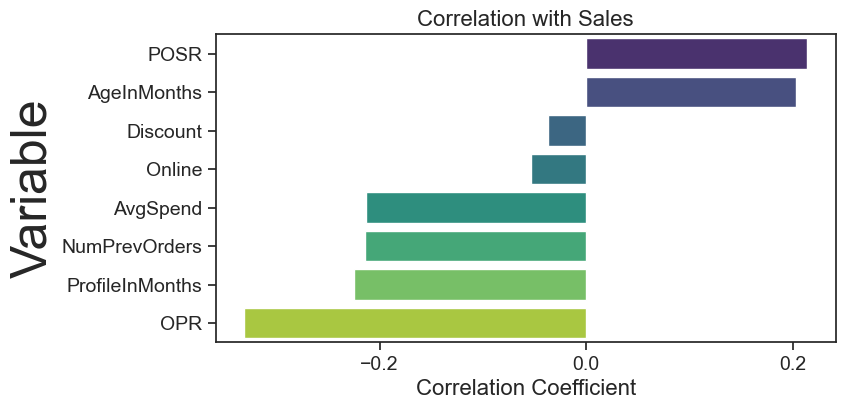

In [211]:
sns.set_palette('viridis')
sns.set_style("ticks")
# Calculate the correlation between "Sales" and other numerical variables
sales_correlations = numerical_df.corrwith(numerical_df['Sales']).sort_values(ascending=False)

# Exclude "Sales" from the correlations
sales_correlations = sales_correlations.drop("Sales")

# Create a bar plot to visualize the correlations
plt.figure(figsize=(8, 4))
sns.barplot(x=sales_correlations.values, y=sales_correlations.index, palette='viridis')
plt.title("Correlation with Sales", fontsize=16)
plt.xlabel("Correlation Coefficient", fontsize=16)
plt.ylabel("Variable")
# Adjust the font size for tick labels
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()


With this simple overview of the correlation between these variables and Sales, it becomes evident that, broadly speaking, these numerical attributes do not exhibit a robust correlation when considered individually. (A robust correlation typically approaches values near 1 or -1.) 
Variables like OPR, ProfileInMonths, NumPrevOrders, and POSR may hold statistical significance, although further inquiry is needed, particularly beyond univariate context.

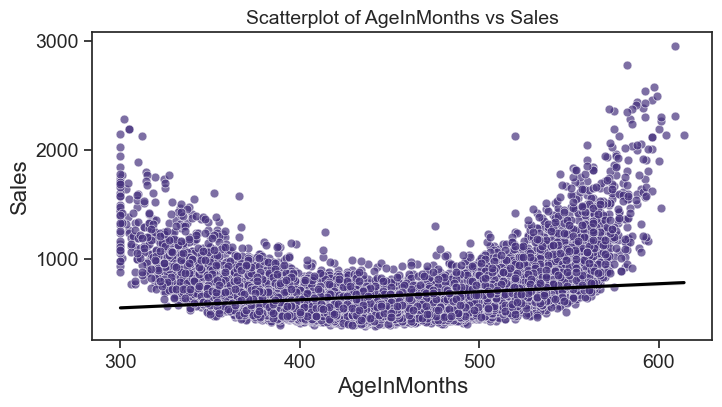

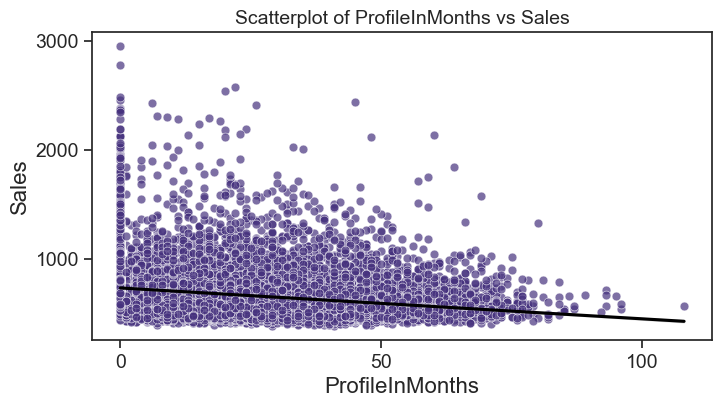

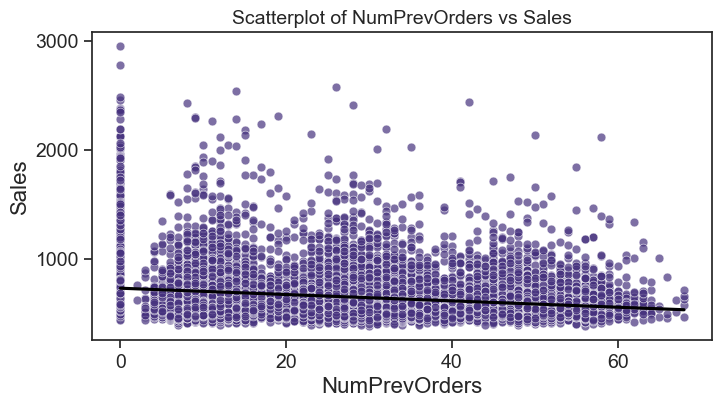

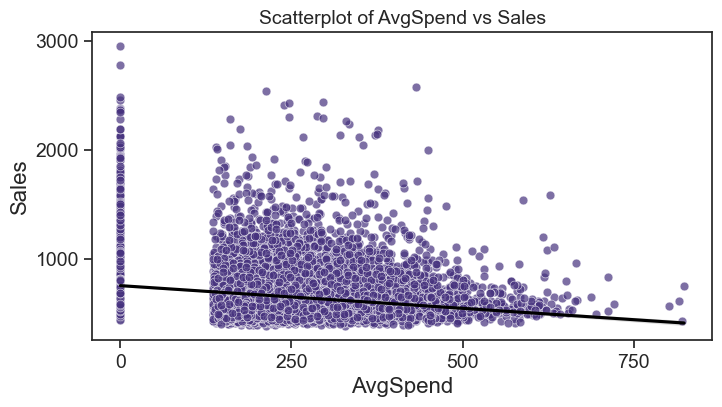

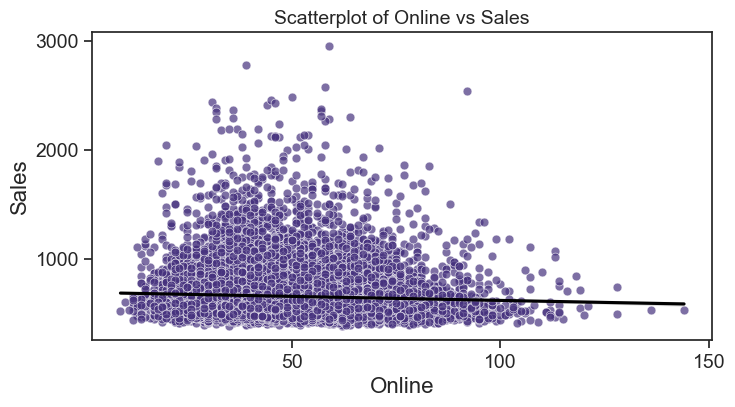

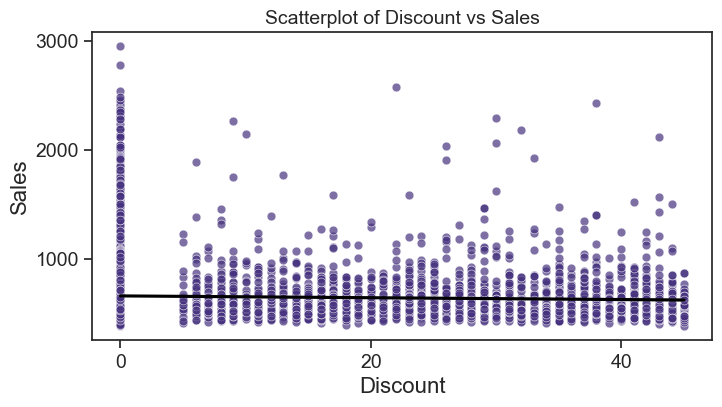

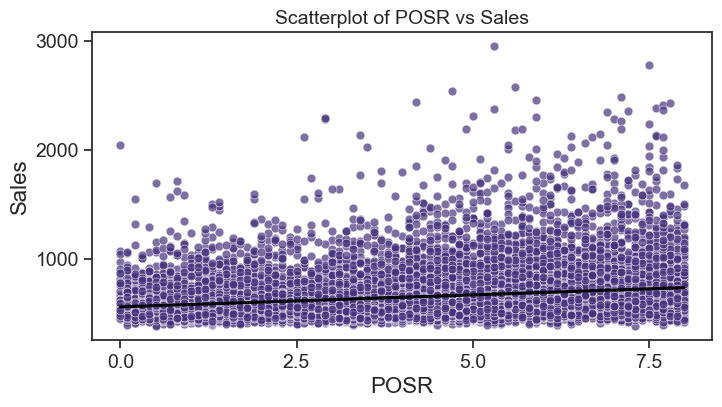

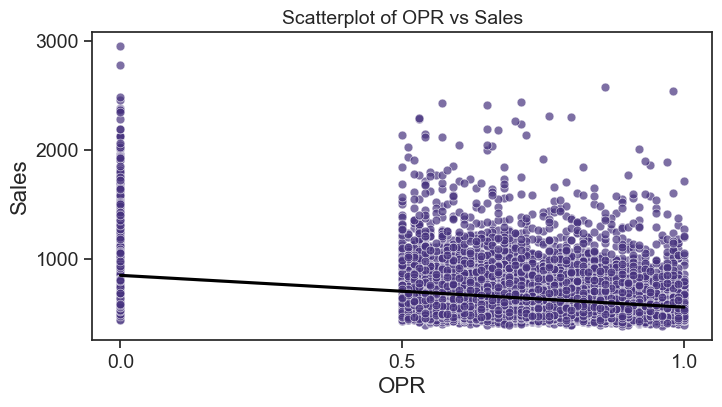

In [212]:
for variable in numerical_vars:
    if variable == 'Sales':
        continue
    
    # Create a scatterplot with a regression line
    plt.figure(figsize=(8, 4))  # Adjust the figure size (e.g., 8x4)
    sns.scatterplot(data=df, x=variable, y='Sales', alpha=0.7, marker='o', s=40)
    sns.regplot(data=df, x=variable, y='Sales', scatter=False, color='black')
    
    plt.title(f"Scatterplot of {variable} vs Sales", fontsize=14)  # Adjust title font size
    plt.xlabel(variable, fontsize=16)  # Adjust x-axis label font size
    plt.ylabel("Sales", fontsize=16)  # Adjust y-axis label font size
    
    # Adjust the font size for tick labels
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    
    plt.show()

While these scatterplots may not have show any compelling evidence of correlation, it does paint a picture of patterns and linearity of relationships. For example, the relationship between Sales and AgeInMonths is seemingly quadratic. For the moment, all other relationships yield no convincing linear relationship.

It would also be suitable to investigate to visualize the standard statistical elements and distributions of these variables i.e summary statistics, confidence intervals, histograms.

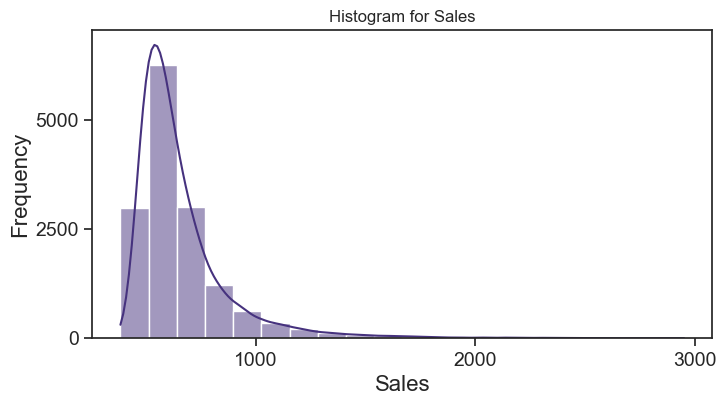

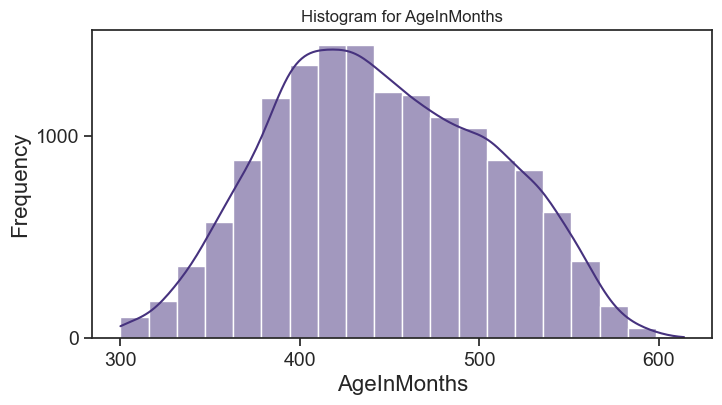

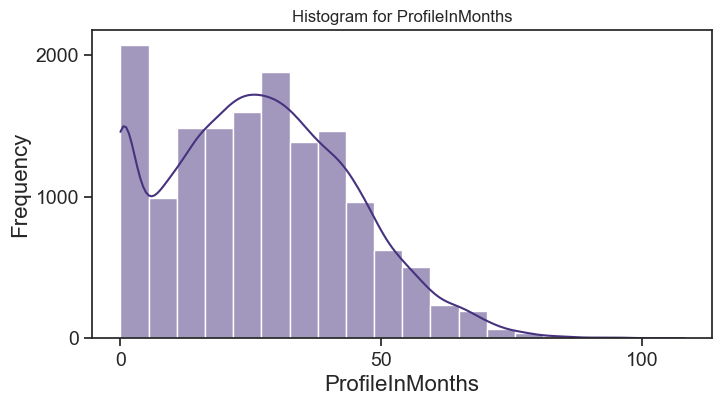

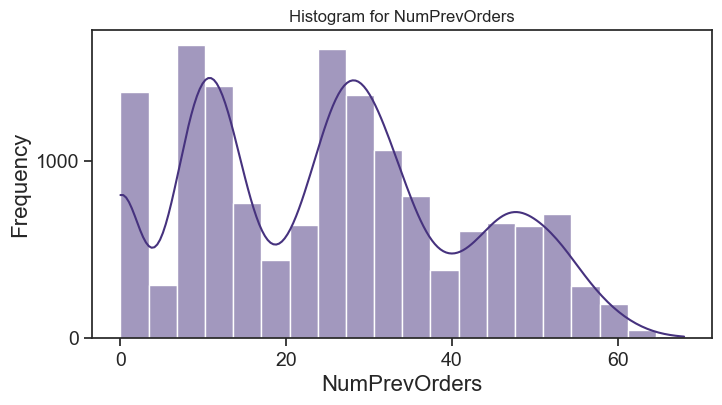

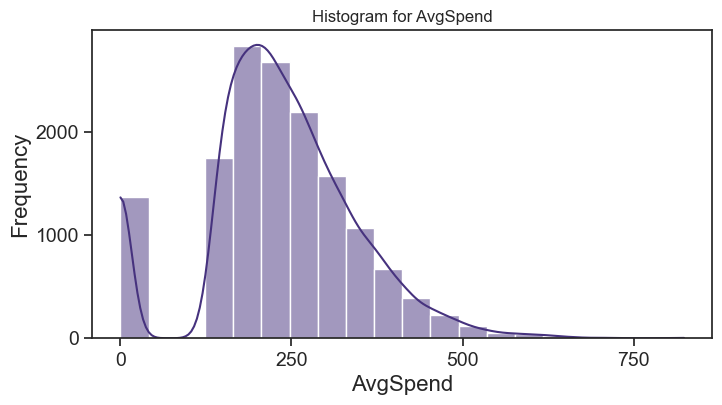

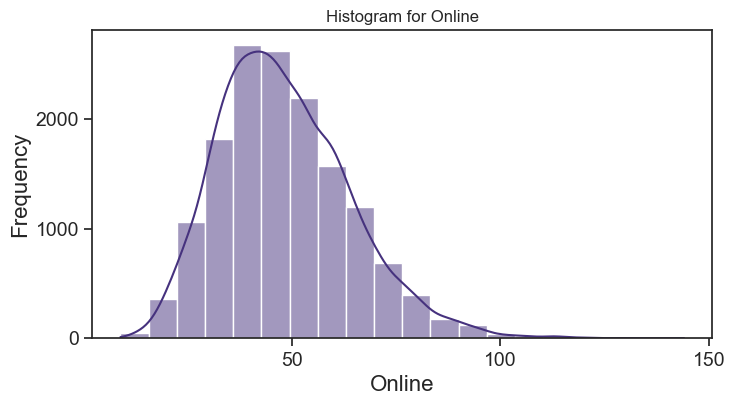

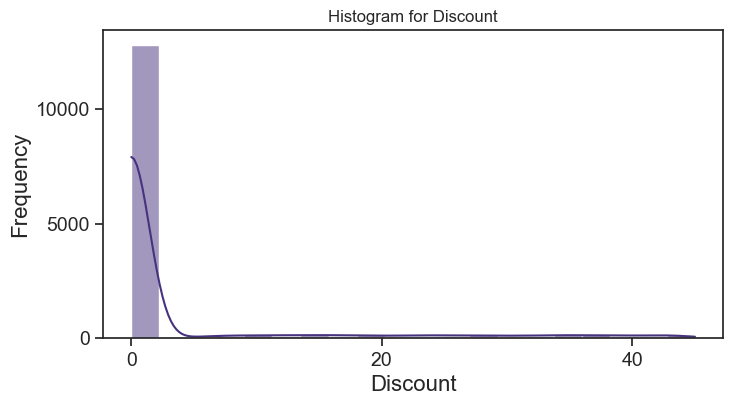

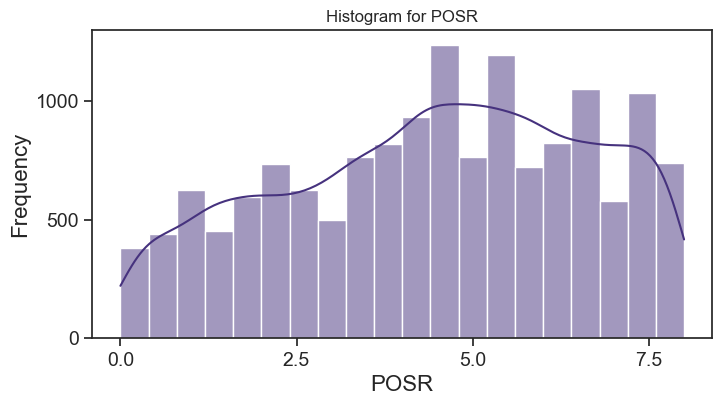

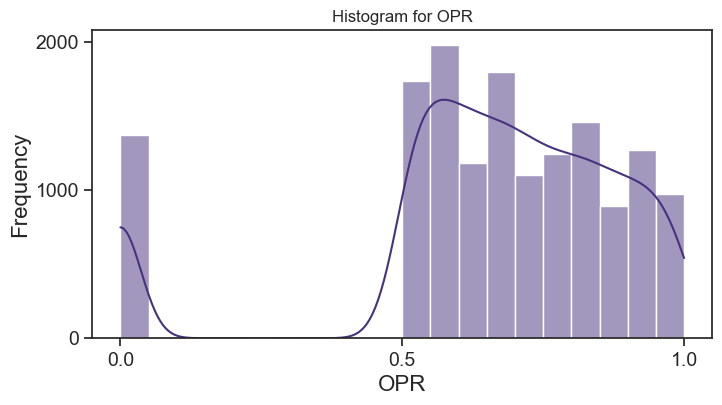


Summary Statistics:
                   Count        Mean     Std Dev     Min      25%     50%  \
Sales            15000.0  659.569531  220.160955  384.55  526.635  598.01   
AgeInMonths      15000.0  445.460600   60.542785  300.00  400.000  441.00   
ProfileInMonths  15000.0   26.810600   17.460889    0.00   14.000   26.00   
NumPrevOrders    15000.0   25.365733   16.258975    0.00   11.000   26.00   
AvgSpend         15000.0  233.676089  112.948936    0.00  174.030  227.97   
Online           15000.0   48.242733   15.806047    9.00   37.000   46.00   
Discount         15000.0    3.683467    9.939409    0.00    0.000    0.00   
POSR             15000.0    4.431333    2.144256    0.00    2.800    4.60   
OPR              15000.0    0.656929    0.250207    0.00    0.570    0.69   

                     75%      Max   95% CI for Mean  
Sales            713.615  2950.51  (656.05, 663.09)  
AgeInMonths      492.000   614.00  (444.49, 446.43)  
ProfileInMonths   39.000   108.00    (26.53, 2

In [213]:
# List of numeric variables (excluding 'Sales')
continuous_variables = ['AgeInMonths', 'ProfileInMonths', 'NumPrevOrders', 'AvgSpend', 'Online', 'Discount', 'POSR', 'OPR']

for variable in ['Sales'] + continuous_variables:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[variable], kde=True, bins=20)
    
    # Adjust the font size for title and labels
    plt.title(f"Histogram for {variable}", fontsize=12)  # Adjust title font size
    plt.xlabel(variable, fontsize=16)  # Adjust x-axis label font size
    plt.ylabel("Frequency", fontsize=16)  # Adjust y-axis label font size
    # Adjust the font size for tick labels
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    
    plt.show()

# Calculate summary statistics for 'Sales' and the continuous variables
summary_statistics = df[['Sales'] + continuous_variables].describe()

# Calculate 95% confidence intervals for the means of 'Sales' and the continuous variables
confidence_intervals = {}
alpha = 0.05  # 95% confidence level

for variable in ['Sales'] + continuous_variables:
    data = df[variable]
    n = len(data)
    mean = data.mean()
    std = data.std()
    margin_of_error = stats.t.ppf(1 - alpha / 2, df=n-1) * (std / np.sqrt(n))
    confidence_intervals[variable] = (mean - margin_of_error, mean + margin_of_error)

# Format and print summary statistics and confidence intervals
formatted_statistics = summary_statistics.transpose()
formatted_statistics['95% CI for Mean'] = [f'({ci[0]:.2f}, {ci[1]:.2f})' for ci in confidence_intervals.values()]
formatted_statistics.columns = ['Count', 'Mean', 'Std Dev', 'Min', '25%', '50%', '75%', 'Max', '95% CI for Mean']

print("\nSummary Statistics:")
print(formatted_statistics)

Now we can see how these numeric variables are roughly distributed. We also get a nice overview on the nature of each variable with the information provided by the summary statistics and confidence interval of the mean values. This information can all be helpful in identifying several interesting observations in the data, such as the maxiumum value for Sales, which instantly seems like an outlier. The same occurs with AvgSpend. We also see that the distribution of Discount is heavily skewed, which makes sense if MatiesMarketplace have few discounts on offer.

An early suggestion could be to implement more frequent discounts. They seem very sparse and more discount periods, even if they're not exactly high discount rates they will probably still positively contribute to Sales.

In [214]:
numeric_variables = df.select_dtypes(include=['number'])
categorical_variables = df.select_dtypes(include=['object'])

## Correlation between numerical variables

We will use Pearson correlation to find the degree of correlation among numerical variables.

In [215]:
corr_matrix = df.corr(numeric_only = True)

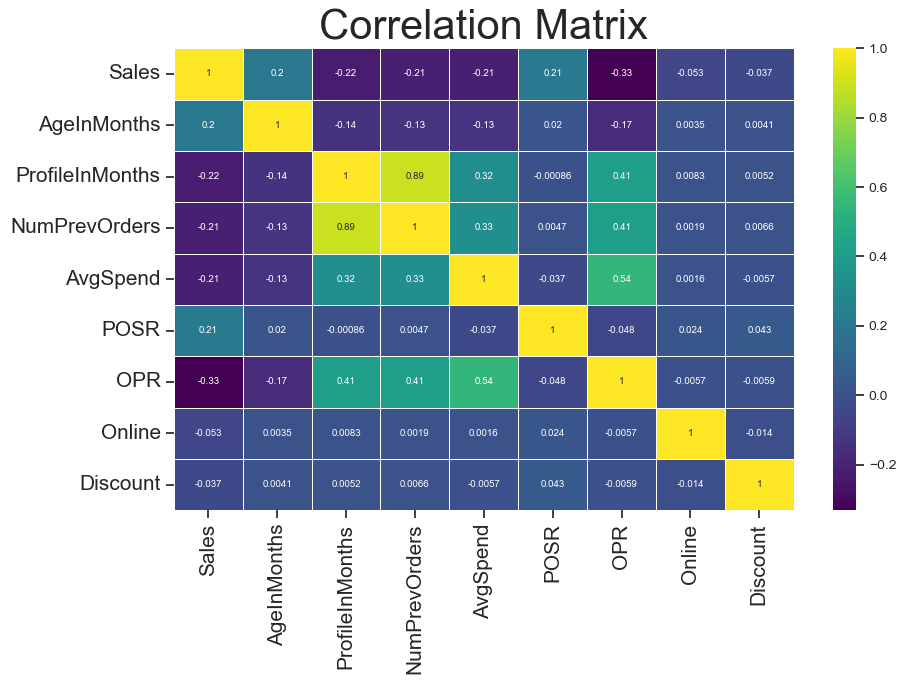

In [216]:
plt.figure(figsize=(10,6))
# Create correlation heatmap
heatmap = sns.heatmap(corr_matrix, annot = True, cmap = 'viridis', linewidth = .5, annot_kws={"size":7},
           yticklabels=True, xticklabels=True)

plt.yticks(fontsize = 15)
plt.xticks(fontsize = 15)

bar = heatmap.collections[0].colorbar
bar.ax.tick_params(labelsize=10)

plt.title("Correlation Matrix", fontsize = 30)
plt.show()

## Correlation between categorical variables

We will use Chi-squared Test to find the degree of correlation among categorical variables.

In [217]:
categorical_columns = ['Month', 'Subscribed', 'ShippingOption', 'Shipping', 'Country', 
                       'Platform', 'Payment', 'DayOfWeek', 'Ad_1', 'Ad_2', 'Ad_3', 
                       'SocialMedia']

# Create an empty DataFrame to store the chi-squared test results
correlation_results = pd.DataFrame(columns=categorical_columns, index=categorical_columns)

# Loop through pairs of categorical columns and perform chi-squared tests
for col1 in categorical_columns:
    for col2 in categorical_columns:
        if col1 != col2:
            contingency_table = pd.crosstab(df[col1], df[col2])
            chi2, p, _, _ = chi2_contingency(contingency_table)
            correlation_results.at[col1, col2] = p

# Display the p-values, which indicate the strength of association between variables
print("Chi-squared test p-values:")
print(correlation_results)
print("\n")


significant_correlations = correlation_results[correlation_results < 0.05]
significant_correlations_list = significant_correlations.stack().index.tolist()


# Print significant correlations
print("\033[1;30mSignificant Chi-squared test correlations (p < 0.05):\033[0m")
for correlation in significant_correlations_list:
    variable1, variable2 = correlation
    print(f"{variable1} and {variable2}")

Chi-squared test p-values:
                   Month Subscribed ShippingOption  Shipping   Country  \
Month                NaN   0.219628       0.793504   0.62756  0.887789   
Subscribed      0.219628        NaN       0.262826   0.00568   0.27999   
ShippingOption  0.793504   0.262826            NaN       0.0       0.0   
Shipping         0.62756    0.00568            0.0       NaN  0.245556   
Country         0.887789    0.27999            0.0  0.245556       NaN   
Platform        0.462271   0.313688       0.882656  0.085233  0.114428   
Payment         0.286551   0.913423       0.765368  0.010452  0.880236   
DayOfWeek       0.660882   0.181318       0.084901  0.850604   0.43817   
Ad_1             0.58436        0.0       0.953151  0.562031  0.699081   
Ad_2            0.202747        0.0       0.220959  0.290939  0.614894   
Ad_3            0.271366        0.0       0.645649  0.918038  0.227225   
SocialMedia     0.204017        0.0       0.716426  0.343912  0.644866   

          

We will refrain from examining relationships between numerical and categorical variables, as it is beyong our scope.

# Removing Outliers

## Z-score Method

We will use the Z-score method to detect outliers.
In pursuit of a more conservative approach, with the intention of preserving valuable information for our model, 
we opt for a Z-score threshold of 3.0. This threshold corresponds to encompassing approximately 99.7% of the 
data within three standard deviations of the mean.

In [218]:
def find_outliers_zscore(column_name, z = 3.0):
    df_2 = pd.read_csv('MatiesMarketplace.csv')
    df_2 = df_2[[column_name]]

    z_scores = np.abs(stats.zscore(df_2))

    threshold = z

    outliers_mask = (z_scores > threshold)

    outliers_df = df_2[outliers_mask.any(axis=1)]

    print("\033[1m" + i + "\033[0m")
    print(outliers_df)
    print('\n')

In [219]:
test_outliers = ['Sales', 'AgeInMonths', 'ProfileInMonths',
       'NumPrevOrders', 'AvgSpend', 'POSR', 'OPR', 'Online', 'Discount']

for i in test_outliers:
    find_outliers_zscore(column_name = i)

Sales
         Sales
45     1399.45
54     1360.77
67     1327.61
119    1732.97
136    2187.58
...        ...
14723  1500.44
14724  1434.00
14768  1407.84
14913  1886.14
14951  1355.47

[320 rows x 1 columns]


AgeInMonths
Empty DataFrame
Columns: [AgeInMonths]
Index: []


ProfileInMonths
       ProfileInMonths
176                 85
638                 84
1645                93
2129                96
2704                82
2775               108
2819                96
3738                81
4127                82
4551                87
4689                84
4998                87
5483                85
5967                80
6136                85
6155                80
6960                86
7465                82
7749                93
8112                92
8343                81
9323                95
10064               82
10658               82
11309               89
11467               82
12457               84
13269               93
14067               84


NumPrevOrders
Emp

Even though there exist outliers in Sales, given the nature of predictive modeling, we will refrain from addressing these outliers, recognizing the importance of retaining essential information, as our primary focus lies in achieving precise predictive outcomes. 
It's also worthy to note outliers represent inherent fluctuations within the population, as it is customary for individuals with more money to exhibit greater expenditure on purchases.

Instead, we will exclusively focus on outliers present in the nominal features.

Evidently, there are no obvious outliers present within the variables AgeInMonths, NumPrevOrders, and POSR.

Looking further at the remaining variables:

Analysing the outliers in Discount:
Using Q1 and Q3:

In [220]:
print('Q1 = ' + str(df['Discount'].quantile(0.25)))
print('Q3 = ' + str(df['Discount'].quantile(0.75)))

Q1 = 0.0
Q3 = 0.0


Quantiles Q1 and Q3, both equal to 0, indicate that a substantial portion, at least 75%, of our Discount is concentrated around zero. This observation implies that the prevailing trend among our customers is either a complete absence of discounts or extremely small discount amounts. 
Given that both Q1 and Q3 have a value of 0, any data entry diverging from this will be classified as an outlier. Consequently, we will abstain from addressing outliers within the 'Discount' variable, as it aligns with this inherent distribution pattern.

We are left with the variables 'ProfileInMonths', 'AvgSpend', 'OPR' and 'Online' and remove the outliers in these variables.

In [221]:
df_new = pd.read_csv('MatiesMarketplace.csv')

df_new1 = df_new[['ProfileInMonths', 'AvgSpend', 'OPR', 'Online']]

z_scores = np.abs(stats.zscore(df_new1))

threshold = 3.0

outliers_mask = (z_scores > threshold)

outlier_rows = df_new1[outliers_mask.any(axis=1)]

# Remove rows with outliers from df_new
df_new = df_new.loc[~outliers_mask.any(axis=1)]

# save graph for grouping 
df_temp = df_new.copy()
df = df_new.copy()

# Creating dummy variables for catergorical variables

In [222]:
df_new = pd.get_dummies(df_new, columns=['Month','Subscribed','ShippingOption','Shipping','Country',
                                     'Platform','Payment','DayOfWeek','Ad_1','Ad_2','Ad_3', 'SocialMedia'])

## Scaling the variables as a part of preprocessing 

In [223]:
scaler = StandardScaler()
numeric_var = ['Sales', 'AgeInMonths', 'ProfileInMonths', 'NumPrevOrders', 'AvgSpend', 'Online', 'Discount', 'POSR', 'OPR']
df_new[numeric_var] = scaler.fit_transform(df_new[numeric_var])

The variables in the dataset were measured in different units and had varying ranges. This difference in scales can lead to biased model training, where certain features dominate the learning process due to their larger magnitude. Scaling the features helps in standardizing them, ensuring that no single feature has an undue influence on the model.

While scaling may improve model performance, it can affect the interpretability of the model. The coefficients or feature importances no longer represent the original data units. However, this trade-off between model performance and interpretability is often acceptable, especially because our primary goal is predictive accuracy.

# Partitioning the data set into training and testing/validation sets
Here we want to split our data into training and validation sets early on so that we can assess how accurate our model is on data of a similar nature to that of the training data. This is done via random sampling.

In [224]:
independent_vars = df_new.drop('Sales', axis=1)
dependent_vars = df_new[['Sales']]
# Randomized split of the data into training and validation/test data.
x_train, x_test,y_train,y_test = train_test_split(independent_vars,dependent_vars,test_size =0.2, random_state=18)
x_train_new = x_train.copy()
y_train_scaled = y_train.copy()

# Selecting Statistically Relevant Variables

## Correlation Analysis 
A low p-value (typically less than a significance level, e.g., 0.05) suggests that the correlation is statistically significant. In other words, you have evidence to reject the null hypothesis, indicating that there is a significant linear relationship between the variables.

A high p-value suggests that the correlation is not statistically significant. You do not have enough evidence to reject the null hypothesis, indicating that there is no significant linear relationship between the variables.

In [225]:
# Define the dependent variable
dependent_variable = 'Sales'

# Create empty lists to store p-values
numeric_p_values = []
categorical_p_values = []

# Max width for variable names
max_var_width = max(len(var) for var in df.columns)

# Check p-values for numeric variables using Pearson correlation
for var in numeric_variables.columns:
    pearson_p_value = stats.pearsonr(df[var], df[dependent_variable])[1]
    numeric_p_values.append((var, pearson_p_value))

# Check p-values for categorical variables using chi-squared test
for var in categorical_variables.columns:
    contingency_table = pd.crosstab(df[var], df[dependent_variable])
    chi2, chi2_p_value, _, _ = stats.chi2_contingency(contingency_table)
    categorical_p_values.append((var, chi2_p_value))

# Set the significance level (alpha)
alpha = 0.05

# Organize variables into significant and not significant
significant_numeric_variables = []
not_significant_numeric_variables = []
significant_categorical_variables = []
not_significant_categorical_variables = []

# Determine significance and separate variables
for var, p_value in numeric_p_values:
    if p_value <= alpha:
        significant_numeric_variables.append((var, p_value))
    else:
        not_significant_numeric_variables.append((var, p_value))

for var, p_value in categorical_p_values:
    if p_value <= alpha:
        significant_categorical_variables.append((var, p_value))
    else:
        not_significant_categorical_variables.append((var, p_value))

# Print significant and not significant variables
def print_variables(variables):
    for var, p_value in variables:
        formatted_p_value = f"{p_value:.2e}"
        print(f"{var:{max_var_width}}: {formatted_p_value}")

print("Significant Variables:")
print_variables(significant_numeric_variables)

print("\nNot Significant Variables:")
print_variables(not_significant_numeric_variables)

Significant Variables:
Sales          : 0.00e+00
AgeInMonths    : 1.13e-142
ProfileInMonths: 1.35e-172
NumPrevOrders  : 4.26e-155
AvgSpend       : 3.60e-161
POSR           : 2.37e-153
OPR            : 0.00e+00
Online         : 5.71e-10
Discount       : 5.93e-06

Not Significant Variables:


We can now see, at a glance, which variables seem statistically relevant;

Significant Numeric Variables:
- AgeInMonths: 4.46e-139
- ProfileInMonths: 1.25e-170
- NumPrevOrders: 1.70e-155
- AvgSpend: 5.12e-154
- POSR: 4.27e-155
- OPR: 0.00e+00
- Online: 8.46e-11
- Discount: 4.46e-06

Significant Categorical Variables:
- Subscribed_Monthly: 5.69e-04
- Subscribed_None: 5.61e-08
- Subscribed_Weekly: 1.92e-18
- ShippingOption_Premium: 1.12e-05
- ShippingOption_Standard: 6.03e-03
- Country_Japan: 2.97e-06
- Ad_1_Yes: 2.20e-10
- Ad_2_Yes: 3.50e-204
- Ad_3_Yes: 4.99e-08
- SocialMedia_Instagram: 7.65e-04
- SocialMedia_None: 2.20e-10
- SocialMedia_Twitter: 6.24e-03


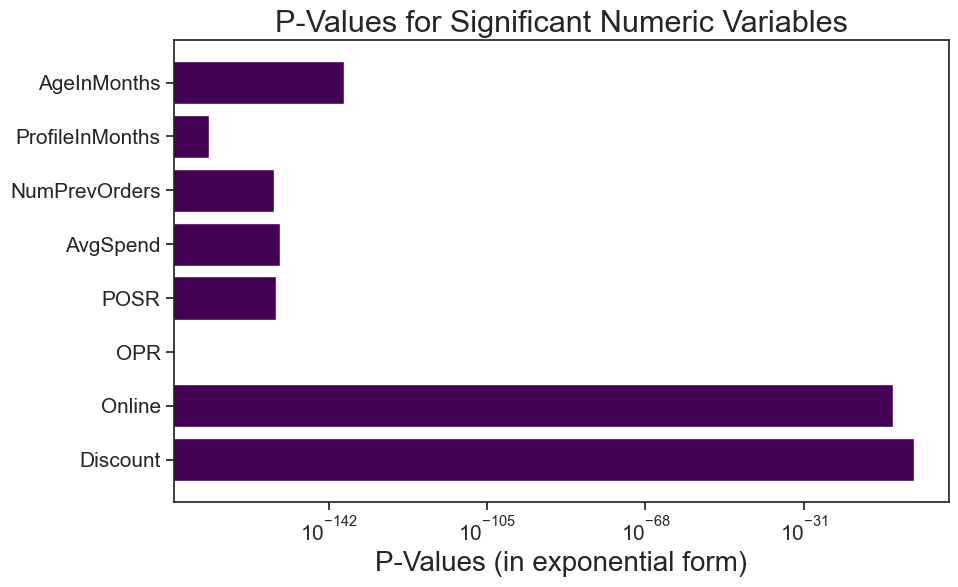

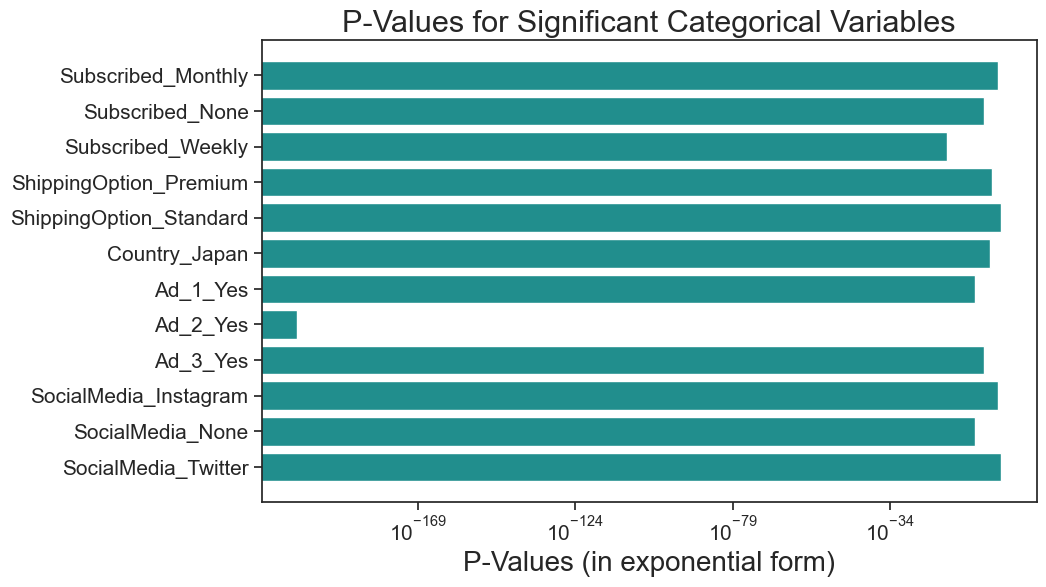

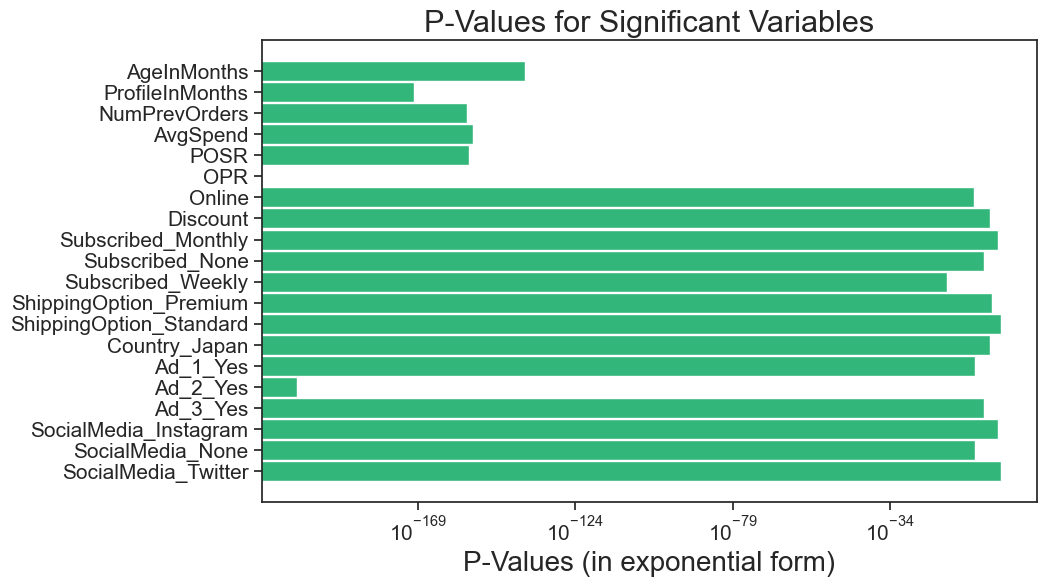

In [226]:
# Significant numeric variables and their p-values
significant_numeric_variables = [
    'AgeInMonths', 'ProfileInMonths', 'NumPrevOrders', 'AvgSpend',
    'POSR', 'OPR', 'Online', 'Discount'
]
p_values_numeric = [4.46e-139, 1.25e-170, 1.70e-155, 5.12e-154, 4.27e-155, 0.00e+00, 8.46e-11, 4.46e-06]

# Create a bar plot for p-values
plt.figure(figsize=(10, 6))
plt.barh(significant_numeric_variables, p_values_numeric, color='#440154')
plt.xlabel('P-Values (in exponential form)',fontsize=20)
plt.title('P-Values for Significant Numeric Variables',fontsize=22)
plt.xscale('log')
plt.gca().invert_yaxis()
plt.xticks(fontsize=15)  # Adjust x-axis tick label font size
plt.yticks(fontsize=15)  # Adjust y-axis tick label font size

# Significant categorical variables and their p-values
significant_categorical_variables = [
    'Subscribed_Monthly', 'Subscribed_None', 'Subscribed_Weekly',
    'ShippingOption_Premium', 'ShippingOption_Standard',
    'Country_Japan', 'Ad_1_Yes', 'Ad_2_Yes', 'Ad_3_Yes',
    'SocialMedia_Instagram', 'SocialMedia_None', 'SocialMedia_Twitter'
]
p_values_categorical = [5.69e-04, 5.61e-08, 1.92e-18, 1.12e-05, 6.03e-03, 2.97e-06, 2.20e-10, 3.50e-204, 4.99e-08, 7.65e-04, 2.20e-10, 6.24e-03]

# Create a bar plot for p-values
plt.figure(figsize=(10, 6))
plt.barh(significant_categorical_variables, p_values_categorical, color='#218E8D')
plt.xlabel('P-Values (in exponential form)',fontsize=20)
plt.title('P-Values for Significant Categorical Variables',fontsize=22)
plt.xscale('log')
plt.gca().invert_yaxis()
plt.xticks(fontsize=15)  # Adjust x-axis tick label font size
plt.yticks(fontsize=15)  # Adjust y-axis tick label font size

# Combine both numeric and categorical variables and their p-values
combined_variables = significant_numeric_variables + significant_categorical_variables
combined_p_values = p_values_numeric + p_values_categorical

# Create a grouped bar plot for combined variables
fig, ax = plt.subplots(figsize=(10, 6))
width = 0.95
x = np.arange(len(combined_variables))

bars = ax.barh(x, combined_p_values, width, label='P-Values', color='#32B67A')

ax.set_xlabel('P-Values (in exponential form)',fontsize=20)
ax.set_title('P-Values for Significant Variables', fontsize=22)
ax.set_xscale('log')
ax.set_yticks(x)
ax.set_yticklabels(combined_variables)
ax.invert_yaxis()
plt.xticks(fontsize=15)  # Adjust x-axis tick label font size
plt.yticks(fontsize=15)  # Adjust y-axis tick label font size
plt.show()


# Feature Selection 

We initially saw that there are $20$ variables with p-values less than a significance level of $0.05$, so it would be safe to look at a maximum of $40$ variables per model.

## Forward stepwise regression

In [227]:
def forward(k, cross, x, y):
    
    '''
    This is a fucntion to do the farward stepwise selection based on a given value 
    for k and a given number of cross validations that has to be made. It then plots 
    the mse on a graph and returns the stepwise regression for further use 
    '''
    # print information based on the regression 
    print("Model using a maximum of", k, "features and a", cross, "-fold cross validation")
    
    # farward stepwise selection
    sfs = SequentialFeatureSelector(LinearRegression(),
                                k_features=k,
                                forward=True,
                                scoring='neg_mean_squared_error',
                                cv=cross)
    
    # fit the data
    stepwise_fit = sfs.fit(x ,y)
    
    # extract and store metrics 
    rslt = stepwise_fit.get_metric_dict()
    
    # calculate the mse
    mse_scores = []
    for _, item in rslt.items():
        ave_mse = -1.0*item['avg_score']
        mse_scores.append(ave_mse)
    
    mse_scores = np.array(mse_scores)
    
    # prepare feature names for graph 
    features = []
    keys = list(rslt.keys())
    columns = list(rslt[keys[-1]]['feature_names'])
    curr_cols = columns.copy()
    
    for key in rslt.keys():
        temp = list(rslt[key]['feature_names'])
        idx_in = [v in temp for v in curr_cols]
        col_in = np.array(curr_cols)[idx_in][0]
        features.append('+' + col_in)
        curr_cols.remove(col_in)
    
    # get the minimum mse to plot on the graph 
    min_mse_index = np.argmin(mse_scores)
    
    # plot the graph 
    plt.figure(figsize=(10, 5))
    plt.scatter(np.arange(len(features)), mse_scores)
    plt.plot(np.arange(len(features)), mse_scores)
    plt.axhline(y=mse_scores[min_mse_index], color='red', linestyle='--', label='Lowest MSE')
    
    # add the labels on the graph 
    plt.xticks(ticks=np.arange(len(features)), labels=features, rotation = 90, fontsize=12)
    plt.yticks(fontsize=12)
    plt.xlabel('Scaled Variables', fontsize=15)
    plt.ylabel('Mean-squared Errors with Scaled Variables', fontsize=15)
    plt.title('Mean-squared Error of a Model as Variables get Added', fontsize=20)

    plt.show()
    
    # return dictionary that contains the metrics 
    return rslt

### Checking the influence of grouping into continents and seasons

In [228]:
#Changing Months & Country variables
df_group = df_temp.copy()
#changing Month to Season
season_dict = {'January': 'Summer',
               'February': 'Summer',
               'March': 'Autumn', 
               'April': 'Autumn',
               'May': 'Autumn',
               'June': 'Winter',
               'July': 'Winter',
               'August': 'Winter',
               'September': 'Spring',
               'October': 'Spring',
               'November': 'Spring',
               'December': 'Summer'}
#add Season column
df_group['Season'] = df_group['Month'].apply(lambda x: season_dict[x])

#changing Country to Continent
con_dict = {'South Africa': 'Africa',
            'England': 'Europe',
            'Japan': 'Asia', 
            'China': 'Asia',
            'Belgium': 'Europe',
            'Ireland': 'Europe',
            'Egypt': 'Africa',
            'India': 'Asia',
            'Germany': 'Europe',
            'Netherlands': 'Europe',
            'Kenya': 'Africa',
            'United States': 'North-America',
            'Brazil' : 'South-America',
            'Italy' : 'Europe'}
#add Continent column
df_group['Continent'] = df_group['Country'].apply(lambda y: con_dict[y])

df_group.drop(['Month'], axis=1, inplace= True)
df_group.drop(['Country'], axis=1, inplace= True)

df_temp_g = df_group.copy()

# turn to dummy variables
df_group = pd.get_dummies(df_group, columns=['Season','Subscribed','ShippingOption','Shipping','Continent',
                                     'Platform','Payment','DayOfWeek','Ad_1','Ad_2','Ad_3', 'SocialMedia'], )


# scale numeric values 
scaler = StandardScaler()
numeric_var = ['Sales', 'AgeInMonths', 'ProfileInMonths', 'NumPrevOrders', 'AvgSpend', 'Online', 'Discount', 'POSR', 'OPR']
df_group[numeric_var] = scaler.fit_transform(df_group[numeric_var])

indep_vars = df_group.drop('Sales', axis=1)
dep_vars = df_group[['Sales']]

# Randomized split of the data into training and validation/test data.
x_train_g, x_test_g ,y_train_g ,y_test_g = train_test_split(indep_vars, dep_vars, test_size =0.2, random_state=18) 

Model using a maximum of 15 features and a 3 -fold cross validation


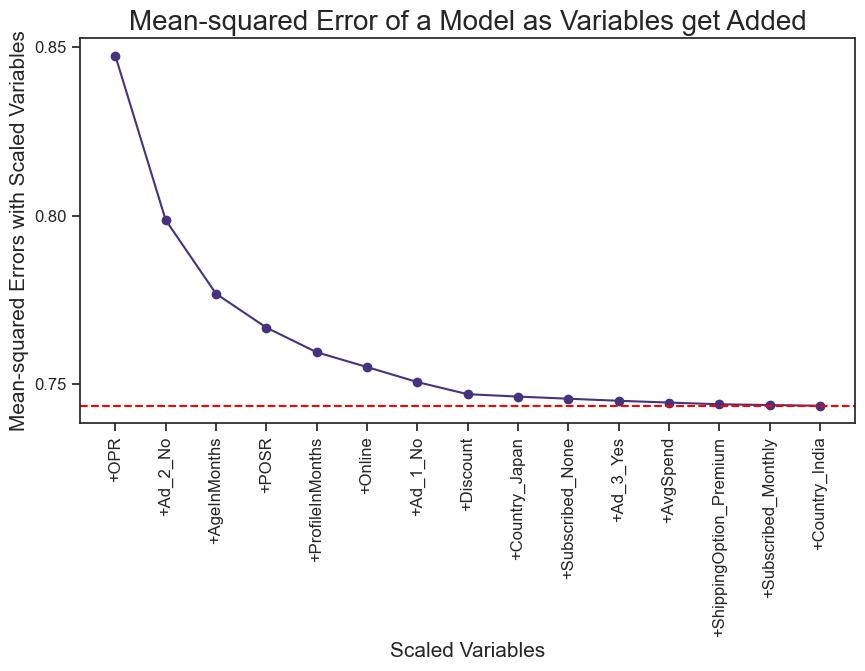

In [229]:
mod = forward(15, 3, x_train_new, y_train_scaled)

Model using a maximum of 15 features and a 3 -fold cross validation


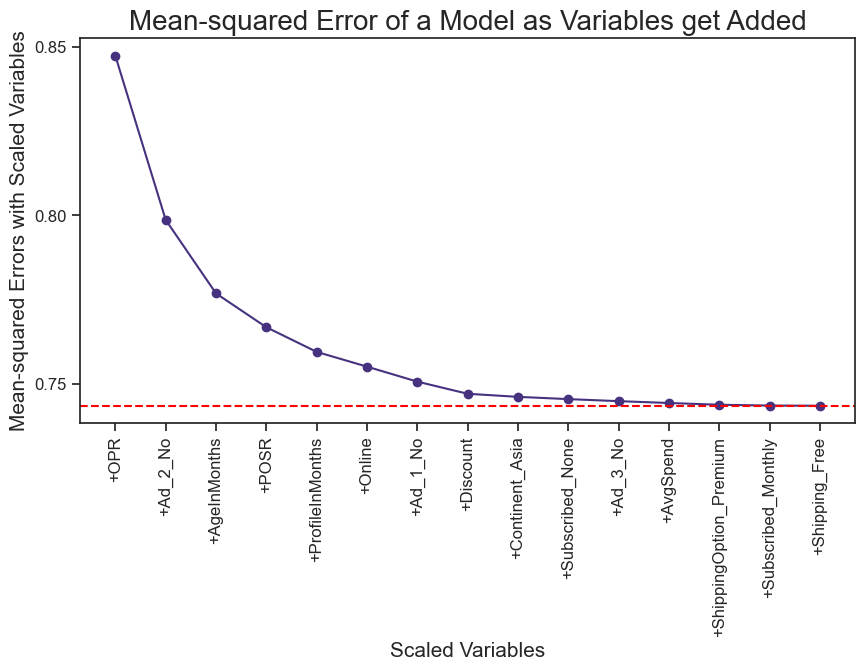

In [230]:
mod_g = forward(15, 3, x_train_g, y_train_g)

In [231]:
print("The mean-squared error not using the groupings :", -1* mod[10]['avg_score'])
print("The mean-squared error using the groupings     :", -1* mod_g[10]['avg_score'])

The mean-squared error not using the groupings : 0.7456878286051921
The mean-squared error using the groupings     : 0.7454402632116292


In an effort to address the challenges posed by the curse of dimensionality, we investigated the impact of grouping, specifically concerning the categorization of seasons and continents. 

Given the nature of Maties Marketplace as an online retail establishment, our focus revolved around assessing whether seasonal variations had a discernible impact on our sales figures, given the known tendency of retail trends to fluctuate in accordance with the seasons.

Upon careful analysis of the graphical representations and analytical outcomes, it became apparent that grouping seasons and continents had a favorable influence on the model's mean squared error (MSE). This restructuring effectively reduced the MSE, a positive development as it signifies a closer alignment between our forecasts and the actual sales figures, indicative of an improved model fit.

While the difference in MSE may appear insignificant, it's essetial to recognize that MSE values are scaled, and even minor fluctuations in this metric can have substantial implications for the accuracy of our predictive model. 

Consequently, due to our commitment to enhancing predictive accuracy, we concluded that the individual contributions of specific countries to the model appear to carry less significance. 
Therefore, our choice is to implement a more efficient strategy that makes use of categorization based on continents and seasons.

In [232]:
# final df for evaluation
df_final = df_group.copy()

### Interactions:
We have decided to focus on the follwing interactions between variables:

#### Ad_2_Yes and POSR:
The investigation of this relationship will serve to study the efficiency of cross-selling strategies, as it is anticipated that customers possessing a heightened POSR may exhibit a greater propensity for positively embracing cross-selling recommendations.

#### ProfileInMonths and OPR:
The interaction between these two variables holds the promise of providing valuable insights into whether customers with more extensive profile histories exhibit characteristics of returning customers who have a clear understanding of their preferences and needs.

#### Ad_3_Yes and AgeInMonths:
Ad_3 focuses on "Hot Products," showcasing a curated selection of popular or newly released items that may be of interest to customers. Given the well-established tendency of younger demographics to place higher importance on trending and popular products, we want to explore the potential interaction between "AgeInMonths" and the impact of "Ad_3."

#### SocialMedia_Instagram and AgeInMonths:
Instagram tends to attract a younger audience. Creating an interaction term between "SocialMedia_Instagram" and "AgeInMonths" allows us to see if advertising on Instagram works differently for various age groups. It helps us understand if we should target specific age ranges more effectively on this platform.

#### AvgSpend and OPR:
The interaction provides insights into how a customer's past spending behaviors, as denoted by "AvgSpend," can affect their order-to-purchase actions. It enables an examination of whether customers with higher spending tendencies are more or less inclined to complete purchases based on their orders.

#### NumPrevOrders and ProfileInMonths:
This allows us to assess whether the length in time of a customer's account influences the relationship between the number of previous orders and their likelihood of making future purchases. This is essential for understanding customer loyalty and retention.

#### NumPrevOrders and AvgSpend:
This is essential to understand how the customers' spending behaviours evolve over time and their propensity for making repeat purchases.

#### Ad_3_Yes and Ad_2_Yes:
The interactiveness between Ad_3_Yes and Ad_2_Yes allows us to explore how these two distinct ad types, coexisting on the same webpage, may influence user behavior and engagement in a unique way.

#### OPR and Discount:
This interactiveness is important to explore because it can provide valuable insights into how the behavior of customers who frequently add items to their cart (OPR) is influenced by the presence of discounts. 

#### OPR and Online:
By examining this interaction, we can assess how the time spent online influences the order-to-purchase behavior of customers. It helps us understand whether customers who spend more time online before making a purchase (or those who make quicker decisions) have different conversion rates.

In [233]:
df_interact = df_group.copy()

var1_list = ['Ad_2_Yes', 'Ad_3_Yes', 'SocialMedia_Instagram', 'AvgSpend', 'NumPrevOrders', 'NumPrevOrders', 'Ad_3_Yes', 'OPR', 'OPR', 'ProfileInMonths']
var2_list = ['POSR', 'AgeInMonths', 'AgeInMonths', 'OPR', 'ProfileInMonths', 'AvgSpend', 'Ad_2_Yes', 'Discount', 'Online', 'OPR']

for i in range(len(var1_list)):
    var1 = var1_list[i]
    var2 = var2_list[i]
    name = var1 + " x " +  var2
    df_interact[name] = df_interact[var1] * df_interact[var2]
    
independent_b = df_interact.drop('Sales', axis=1)
dependent_b = df_interact[['Sales']]
# Randomized split of the data into training and validation/test data.
x_train_b, x_test_b, y_train_b, y_test_b = train_test_split(independent_b ,dependent_b ,test_size =0.2, random_state=18)

Model using a maximum of 20 features and a 3 -fold cross validation


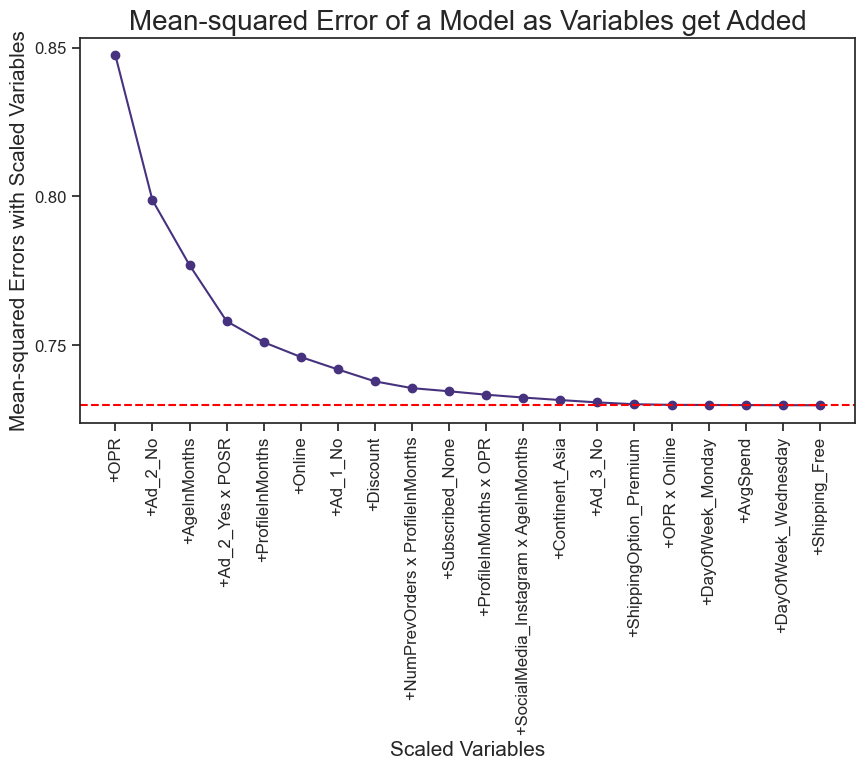

In [234]:
farward_bivariate = forward(20, 3, x_train_b, y_train_b)

Based on the graph above we can see that the interactive terms that have the biggest impact are `Ad_2_Yes x POSR` , `NumPrevOrders x ProfileInMonths`, `NumPrevOrders x ProfileInMonths`, `SocialMedia_Instagram x AgeInMonths` and `OPR x Online`. These are the only interactive terms will continue to assess.

In [235]:
interactive = ['Ad_2_Yes x POSR' , 'NumPrevOrders x ProfileInMonths', 'NumPrevOrders x ProfileInMonths', 
               'SocialMedia_Instagram x AgeInMonths', 'OPR x Online']

for x in interactive:
    # Concatenate the specified column from df_interact to df_final
    df_final = pd.concat([df_final, df_interact[x]], axis=1)

In [236]:
#final test and train partitioning 
independent = df_final.drop('Sales', axis=1)
dependent = df_final[['Sales']]
# Randomized split of the data into training and validation/test data.
x_train_f, x_test_f, y_train_f, y_test_f = train_test_split(independent ,dependent ,test_size =0.2, random_state=18)

Model using a maximum of 6 features and a 2 -fold cross validation


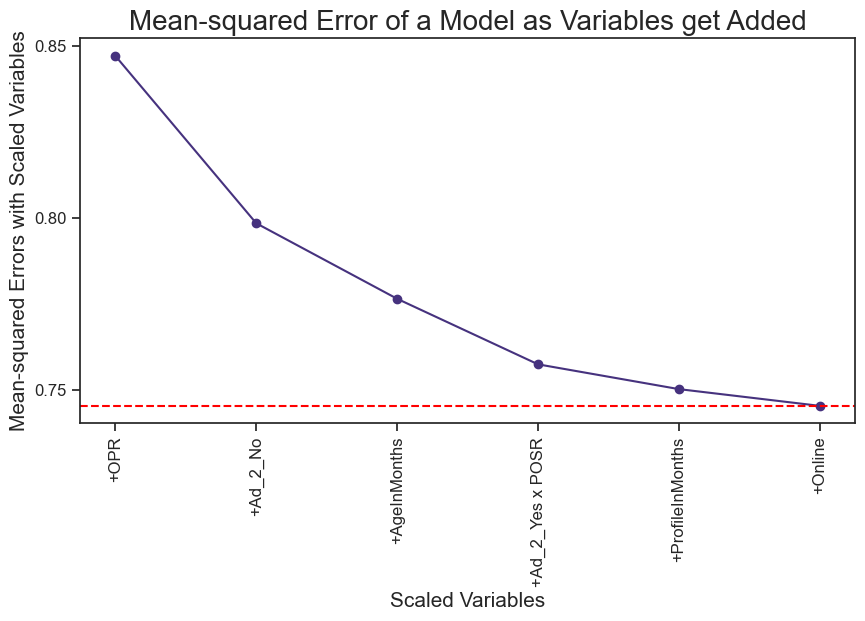

In [237]:
forward_1 = forward(6, 2, x_train_f, y_train_f)

The optimal model with $6$ variables contains the variables `OPR` , `Ad_2_yes`, `AgeInMonths`, `POSR`, `ProfileInMonths` and `Online`. We will now increase the number of variables and the number of cross-validations to see if we can get a better fit using more variables.

Model using a maximum of 40 features and a 5 -fold cross validation


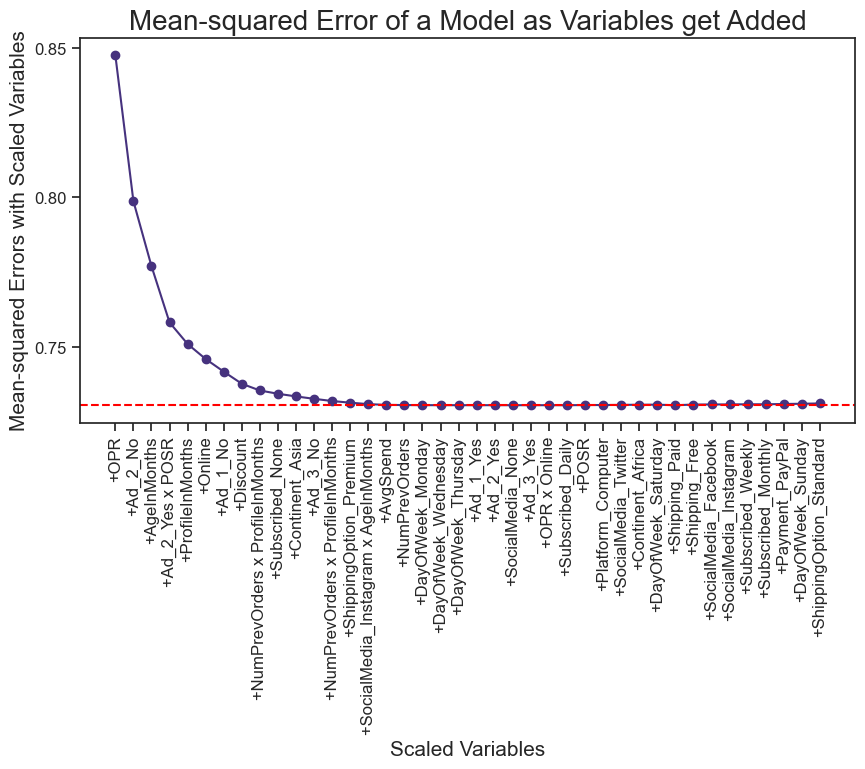

In [238]:
forward_2 = forward(40, 5, x_train_f, y_train_f)

As indicated by the graph, the initial $16$ variables exert the most significant influence on the mean-squared error. However, the model experiences only marginal improvements until the inclusion of the $24th$ variable, after which it begins to deteriorate. Based on farward selection the best model will include the variables `OPR`, `Ad_2_Yes`, `AgeInMonths`, `POSR`, `ProfileInMonths`, `Online`, `Ad_1_yes`, `Discount`, `Subscribed_None`, `Ad_3_Yes`, `ShippingOption_Premium` and `Country_Japan`. Other variables that could be added are `DayOfWeek_Thursday`, `Month_January`, `Subscribed_Monthly`, `Shipping_Paid`, `Country_Germany`, `Country_India`, `Country_China`, `Month_February`, `Month_June`, `Month_September`, `Country_Kenya` and `ShippingOption_Standard`. It is essential to exercise caution when adding these variables to prevent overfitting the data. 

In [239]:
# save the models suggested above 
mod_1 = list(forward_2[16]['feature_names'])

## Backward Stepwise Selection

In [240]:
def backward(k, cross):
    
    '''
    This is a function to do the backward stepwise selection based on a given value 
    for k and a given number of cross validations that has to be made
    '''
    print("Model with a maximum of", k, "features and a", cross, "-fold cross validation")
    
    # backward stepwise
    sfs = SequentialFeatureSelector(LinearRegression(),
                                    k_features=k,
                                    forward=False,  # Change to False for backward selection
                                    scoring='neg_mean_squared_error',
                                    cv=cross)
    
    # Fit the data
    stepwise_fit = sfs.fit(x_train_f, y_train_f)
    
    # Get the selected variables 
    rslt = stepwise_fit.get_metric_dict()
    
    # Get the mean squared errors for each step
    mse_scores = []
    for _, item in rslt.items():
        ave_res = -1.0*item['avg_score']
        mse_scores.append(ave_res)
        
    mse_scores = np.array(mse_scores)
    
    key_list = list(rslt.keys())
    all_cols = list(rslt[key_list[0]]['feature_names'])
    curr_cols = all_cols.copy()
    
    # Get the features for the graph 
    features = ['full model']
    
    # Format the features for the graph 
    for i in range(1, len(rslt)):
        key = key_list[i]
        tmp_vars = list(rslt[key]['feature_names'])
        idx_dropped = [v not in tmp_vars for v in curr_cols]
        col_dropped = np.array(curr_cols)[idx_dropped][0]
        features.append('-' + col_dropped)
        curr_cols = tmp_vars
    
    # get the minimum mse for the graph 
    min_mse_index = np.argmin(mse_scores)
    
    # plot the graph 
    plt.figure(figsize=(10, 5))
    plt.scatter(np.arange(len(features)), mse_scores, color='darkred')
    plt.plot(np.arange(len(features)), mse_scores, color='darkred')
    plt.axhline(y=mse_scores[min_mse_index], color='blue', linestyle='--', label='Lowest MSE')
    
    # set the labels for the graph 
    plt.xticks(ticks=np.arange(len(features)), labels=features, rotation=90, fontsize=12)
    plt.yticks(fontsize=12)
    plt.xlabel('Scaled Variables', fontsize=15)
    plt.ylabel('Mean-squared Errors with Scaled Variables', fontsize=15)
    plt.title('Mean-squared Error of a Model as Variables get Removed', fontsize=20)

    plt.show()
    
    # return dictoinary that contains the metrics 
    return rslt

Model with a maximum of 28 features and a 2 -fold cross validation


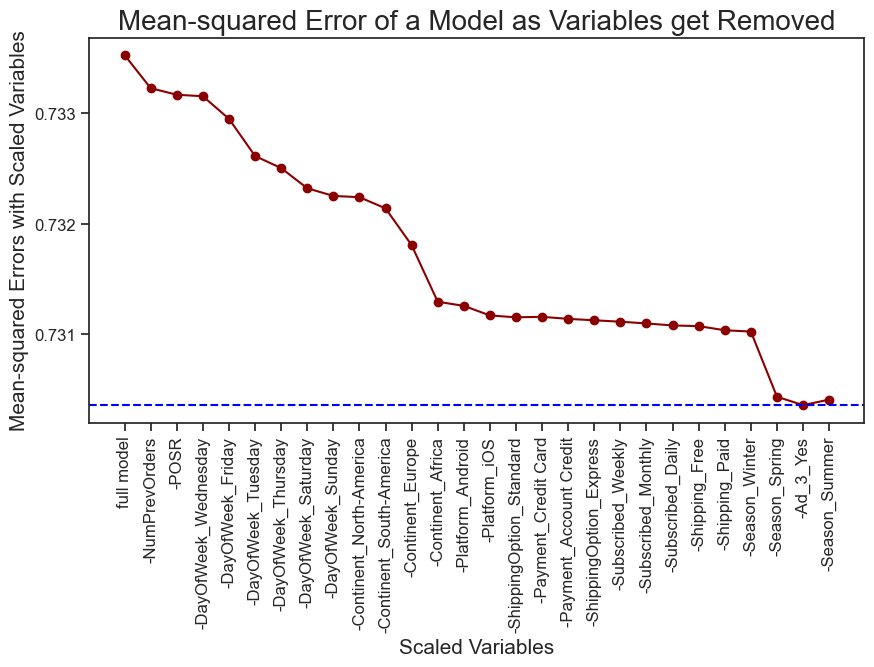

In [241]:
backward_1 = backward(28, 2)

Doing the backwards selection with $20$ variables at most and $2$-fold cross-validation sujests that the following variables should be used to create the model: `AgeInMonths`, `ProfileInMonths`, `AvgSpend`, `POSR`, `OPR`, `Online`, `Discount`,`Month_August`, `Month_February`, `Month_January`, `Month_May`, `Subscribed_Weekly`, `ShippingOption_Premium`, `ShippingOption_Standard`, `Shipping_Paid`, `Country_India`, `Country_Japan`, `Country_Kenya`, `Country_South Africa`, `Platform_iOS`, `DayOfWeek_Monday`, `DayOfWeek_Thursday`, `DayOfWeek_Tuesday`, `DayOfWeek_Wednesday`, `Ad_1_Yes`, `Ad_2_Yes`, `Ad_3_Yes`. According to the graph when removing more variables the MSE will increase. Since lowering the MSE is the objective we try avoid this. 

In [242]:
mod_2 = list(backward_1[30]['feature_names'])

## Conclusion on variable selection

After analysing correlations, p-values and feature importance as well as our stepwise linear regression models we can now attempt to select the most significant variables for a regression model. We can do that by determining which variables are reoccuring the most between all these feature selection tests.

# Starting The Model Selection Process

In [243]:
df_final[numeric_var] = scaler.inverse_transform(df_final[numeric_var])
df_final.columns

Index(['Sales', 'AgeInMonths', 'ProfileInMonths', 'NumPrevOrders', 'AvgSpend',
       'POSR', 'OPR', 'Online', 'Discount', 'Season_Autumn', 'Season_Spring',
       'Season_Summer', 'Season_Winter', 'Subscribed_Daily',
       'Subscribed_Monthly', 'Subscribed_None', 'Subscribed_Weekly',
       'ShippingOption_Express', 'ShippingOption_Premium',
       'ShippingOption_Standard', 'Shipping_Free', 'Shipping_Paid',
       'Continent_Africa', 'Continent_Asia', 'Continent_Europe',
       'Continent_North-America', 'Continent_South-America',
       'Platform_Android', 'Platform_Computer', 'Platform_iOS',
       'Payment_Account Credit', 'Payment_Credit Card', 'Payment_EFT',
       'Payment_PayPal', 'DayOfWeek_Friday', 'DayOfWeek_Monday',
       'DayOfWeek_Saturday', 'DayOfWeek_Sunday', 'DayOfWeek_Thursday',
       'DayOfWeek_Tuesday', 'DayOfWeek_Wednesday', 'Ad_1_No', 'Ad_1_Yes',
       'Ad_2_No', 'Ad_2_Yes', 'Ad_3_No', 'Ad_3_Yes', 'SocialMedia_Facebook',
       'SocialMedia_Instagram', 'Socia

In [244]:
#final test and train partitioning 
f_independent = df_final.drop('Sales', axis=1)
f_dependent = df_final[['Sales']]
# Randomized split of the data into training and validation/test data.
f_x_train, f_x_test, f_y_train, f_y_test = train_test_split(f_independent ,f_dependent ,test_size =0.2, random_state=18)

In [245]:
def find_best_fucntion(X_selected):
    
    # Add a constant for the intercept
    X_selected = sm.add_constant(X_selected)

    # Fit an OLS regression model
    model_selected = sm.OLS(f_y_train, X_selected).fit()

    # Print the summary of the model
    print(model_selected.summary())
    # Obtain the residuals
    residuals = model_selected.resid

    # Create a scatter plot of residuals vs. predicted values
    plt.scatter(model_selected.fittedvalues, residuals)
    plt.xlabel('Fitted Values')
    plt.ylabel('Residuals')
    plt.title('Residual Plot')
    plt.axhline(y=0, color='r', linestyle='-')
    plt.show()

    # Create a QQ plot to check normality of residuals
    sm.qqplot(residuals, line='s')
    plt.title('QQ Plot of Residuals')
    plt.show()

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.240
Model:                            OLS   Adj. R-squared:                  0.239
Method:                 Least Squares   F-statistic:                     233.0
Date:                Mon, 23 Oct 2023   Prob (F-statistic):               0.00
Time:                        00:38:55   Log-Likelihood:                -78814.
No. Observations:               11842   AIC:                         1.577e+05
Df Residuals:                   11825   BIC:                         1.578e+05
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
co

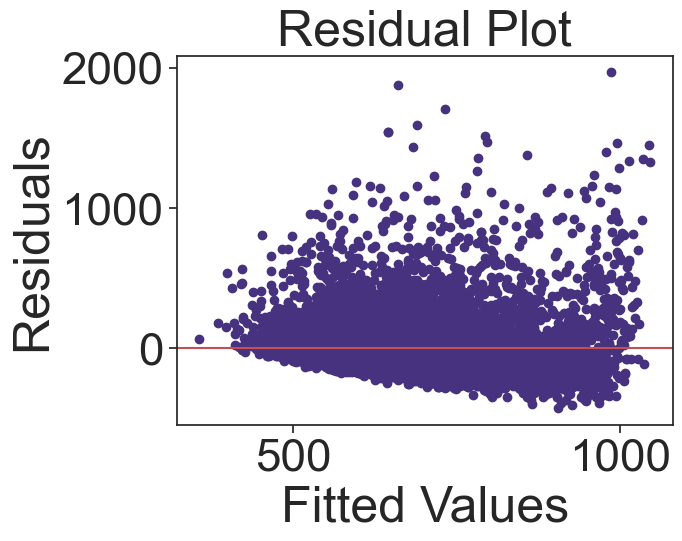

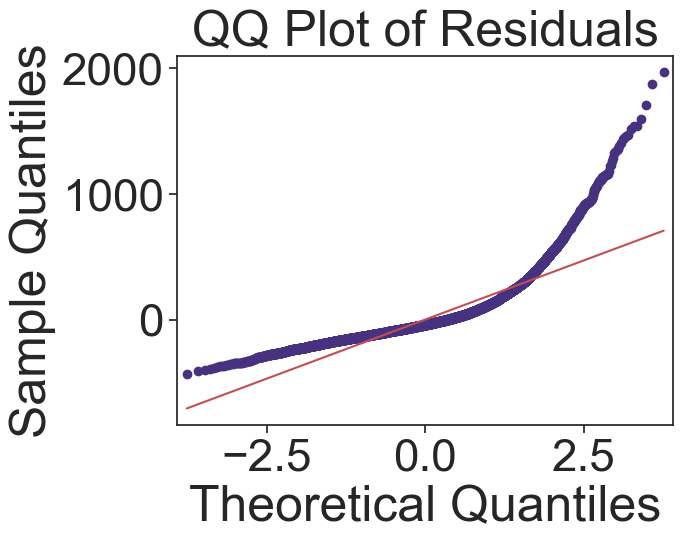

In [246]:
X_selected = f_x_train[mod_1]
find_best_fucntion(X_selected)

The first linear model we built was based off the model that performed the best when performing forward linear regression. This model did not perform well so we decided to investigate some other variables selections. 

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.240
Model:                            OLS   Adj. R-squared:                  0.238
Method:                 Least Squares   F-statistic:                     155.5
Date:                Mon, 23 Oct 2023   Prob (F-statistic):               0.00
Time:                        00:38:56   Log-Likelihood:                -78811.
No. Observations:               11842   AIC:                         1.577e+05
Df Residuals:                   11817   BIC:                         1.579e+05
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
co

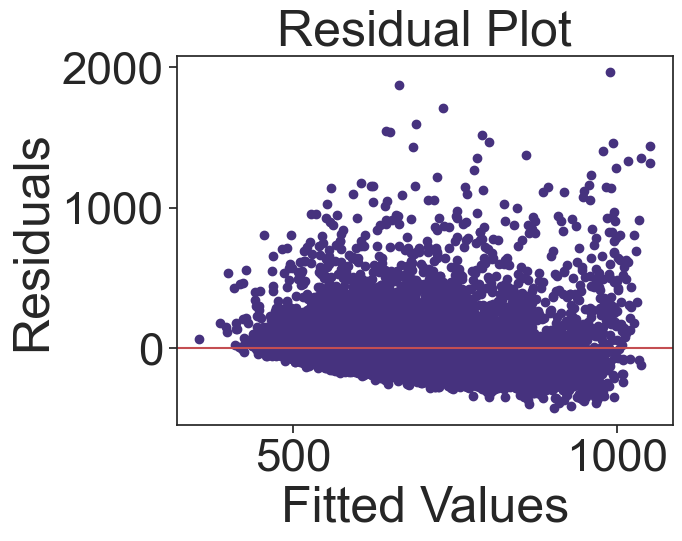

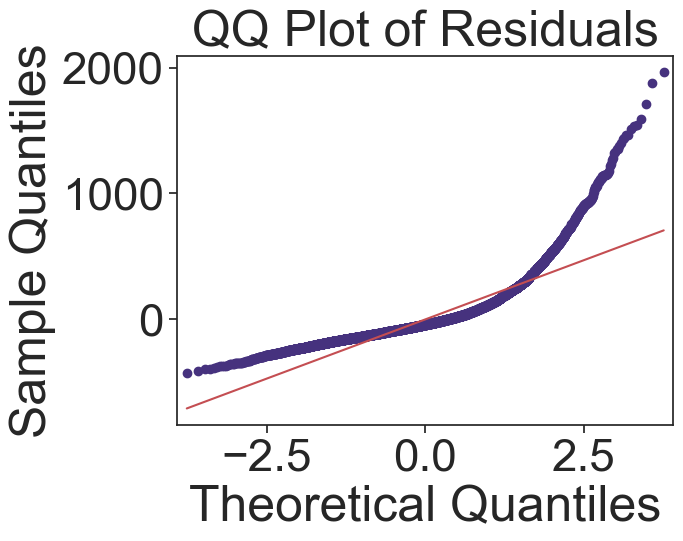

In [247]:
X_selected = f_x_train[mod_2]
find_best_fucntion(X_selected)

The second linear model we built was based off the model that performed the best when performing backward linear regression. This model did not perform well so we decided to investigate some other variables selections.

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.240
Model:                            OLS   Adj. R-squared:                  0.239
Method:                 Least Squares   F-statistic:                     196.3
Date:                Mon, 23 Oct 2023   Prob (F-statistic):               0.00
Time:                        00:38:57   Log-Likelihood:                -78812.
No. Observations:               11842   AIC:                         1.577e+05
Df Residuals:                   11822   BIC:                         1.578e+05
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
co

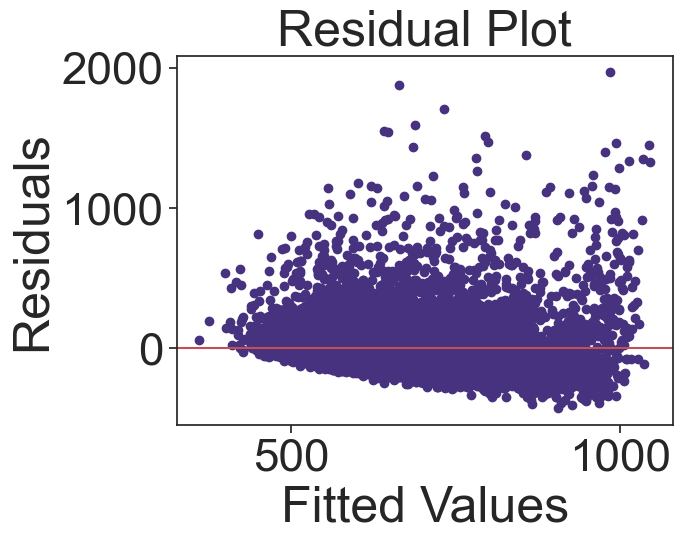

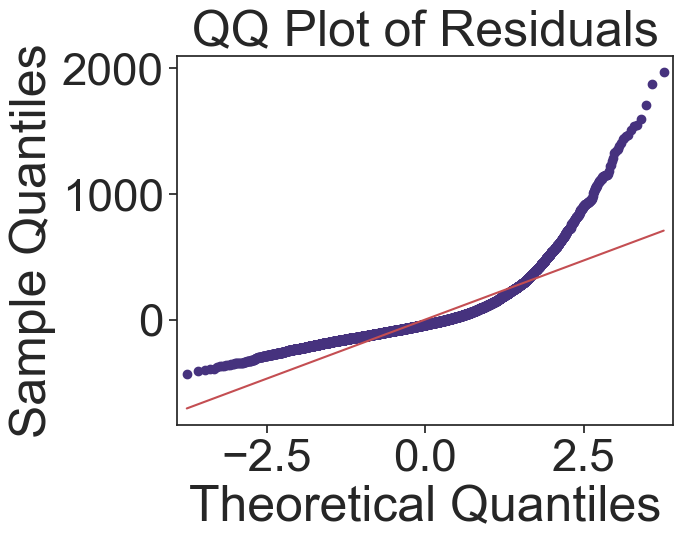

In [248]:
mod_3 = mod_1.copy()
mod_3.append('NumPrevOrders')
mod_3.append('Ad_2_Yes')
mod_3.remove('Ad_2_No')
mod_3.append('POSR')
mod_3.append('SocialMedia_Instagram')

X_selected = f_x_train[mod_3]
find_best_fucntion(X_selected)

In our third model iteration, we introduced additional variables to ensure that all the components used in our interaction terms were included, aligning with the hierarchy principle. To streamline the model, we eliminated the variable Ad_2_No to address redundancy. Despite these adjustments, our model's performance did not exhibit improvement as expected.

After extensive and determined efforts, we reached a point where further improvements to the model proved elusive despite our persistent attempts. As a result, we made the decision to conclude this phase of the project and use one of the previously stated models as it was the most accurate model we could fit. We decided on the model based on forward selection as it had the highest F-statistic

The estimated model is

$$\hat{y} = 702.81 + 0.55x_1 - 1.63x_2 - 0.043x_3 - 197.31x_4 - 1.07x_5 - 1.34x_6 - 19.30x_7 + 13.78x_8 + 19.1x_9 - 32.3x_{10} - 91.27x_{11} - 14.85x_{12} + 51.9x_{13} + 5.59x_{14} - 20x_{15} - 5.48x_{16} , $$

where $\hat{y}$ is the prediction of `Sales` and :
- $x_1$ is `AgeInMonths` 
- $x_2$ is `ProfileInMonths`
- $x_3$ is `AvgSpend`  
- $x_4$ is `OPR` 
- $x_5$ is `Online`
- $x_6$ is `Discount`
- $x_7$ is `Subscribed_None`
- $x_8$ is `ShippingOption_Premium`
- $x_9$ is `Continent_Asia` 
- $x_{10}$ is `Ad_1_No` 
- $x_{11}$ is `Ad_2_No` 
- $x_{12}$ is `Ad_3_No` 
- $x_{13}$ is `Ad_2_Yes x POSR` 
- $x_{14}$ is `NumPrevOrders x ProfileInMonths`
- $x_{15}$ is `SocialMedia_Instagram x AgeInMonths`
- $x_{16}$ is `OPR x Online`

# Predictive Modelling 
## Random Forest Modeling

A random forest tree builds multiple decision tress during training and then combines theirs outputs to make predicitons. The model uses bootstrapping i.e. randombom sammpling with replacement, so some points may appear multiple times in the subset. The tree is built by recursively splitting nodes based on the selected features. These splits are chosen to reduce the mean squared error. 

In [249]:
#final test and train partitioning 
f_independent = df_final[mod_1]
f_dependent = df_final[['Sales']]
# Randomized split of the data into training and validation/test data.
f_x_train, f_x_test, f_y_train, f_y_test = train_test_split(f_independent ,f_dependent ,test_size =0.2, random_state=18)

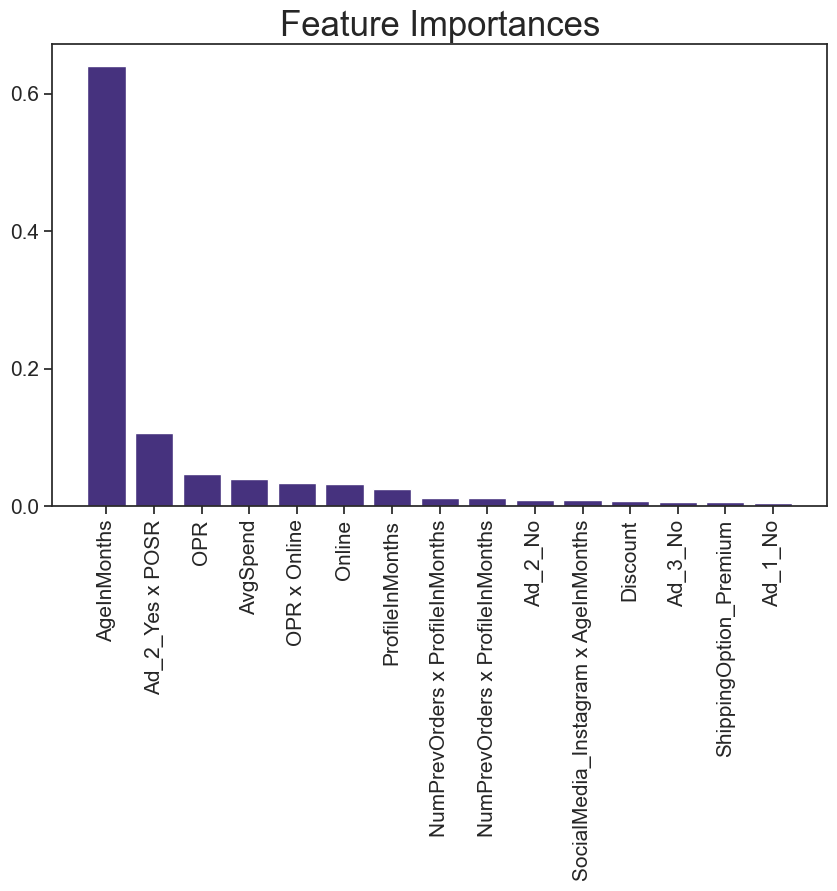

In [250]:
# set y_train to the right format 
y_train_new = np.array(f_y_train).ravel()

# regression
forest = RandomForestRegressor(n_estimators=100, random_state=42)
forest.fit(f_x_train, y_train_new)

# select important features
importances = forest.feature_importances_

# Sort feature importances
indices = importances.argsort()[::-1]

# Plot feature importances
plt.figure(figsize=(10, 6))
plt.title("Feature Importances", fontsize = 25)

# Filter features with non-zero importance
non_zero_importance_indices = [i for i in indices if importances[i] > 0.005]
non_zero_importances = [importances[i] for i in non_zero_importance_indices]
feature_labels = [f_x_train.columns[i] for i in non_zero_importance_indices]

plt.bar(range(len(non_zero_importances)), non_zero_importances, align="center")
plt.xticks(range(len(non_zero_importances)), feature_labels, rotation=90, fontsize = 15)
plt.yticks(fontsize = 15)
plt.show()

The graph displays only the features with an importance score greater than $0.005$, resulting from the Random Forest modeling. This selective representation simplifies the visualization. Notably, `AgeInMonths` stands out as the most influential feature by a significant margin. To enhance prediction accuracy, it is essential to incorporate these high-importance variables into your model.

## Prediction on the Train Data 

In [251]:
# get the mse and r^2
y_pred_train = forest.predict(f_x_train)
mse_train = mean_squared_error(f_y_train, y_pred_train)
r2_train = r2_score(f_y_train, y_pred_train)

print(f"Mean Squared Error: {mse_train}")
print(f"R-squared: {r2_train}")

Mean Squared Error: 1754.9100755433267
R-squared: 0.9622517781352463


## Prediction on the Test Data 

In [252]:
# get the mse and r^2
y_pred_test = forest.predict(f_x_test)
mse_test = mean_squared_error(f_y_test, y_pred_test)
r2_test = r2_score(f_y_test, y_pred_test)

print(f"Mean Squared Error: {mse_test}")
print(f"R-squared: {r2_test}")

Mean Squared Error: 14271.895802877547
R-squared: 0.7490503422404391


This model performs very well on the training data with a $R^{2}$ value of $0.9622$ which means that $96.26$% of variability in `Sales` can be explained by our random forest model. The mean squared error being $0.035$ further proves that the predicted values are very close to the actual values. This could be an indication of overfitting so we tested the model against our test data and saw that it still performed very well with a $R^{2}$ value of $0.7468$ this means that $74.68$% of variability in `Sales` can be explained by the model. 